In [2]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import sqlite3 as sql
import pyarrow.parquet as pq
# 1 min 15 sec

In [3]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers  = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [4]:
# Now import from Enum
sys.path.append('/groups/icecube/cyan/factory/DOMification')
from Enum.Flavour import Flavour
from Enum.EnergyRange import EnergyRange
from EventPeek.PseudoNormaliser import PseudoNormaliser

In [5]:
source_root = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/"

In [6]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [7]:
def convertDBtoDF(file: str, table: str, N_events: int = None) -> pd.DataFrame:
    con = sql.connect(file)
    # First, get the distinct event_no values, limited by N_events
    print(f"Reading {N_events} events from {table} of {file}")
    event_no_query = f"SELECT DISTINCT event_no FROM {table} LIMIT {N_events}"
    event_nos = pd.read_sql_query(event_no_query, con)["event_no"].tolist()

    # Construct the main query to filter by the selected event_nos
    event_no_list = ', '.join(map(str, event_nos))  # Convert list to a comma-separated string
    query = f"SELECT * FROM {table} WHERE event_no IN ({event_no_list})"

    # Run the main query to retrieve the filtered data
    df = pd.read_sql_query(query, con)
    con.close()

    return df

In [8]:
['truth', 'SRTInIcePulses', 'event_no_SRTInIcePulses', 'OnlineL2_SplineMPE', 'LineFit', 'GNHighestEInIceParticle', 'GNHighestEDaughter', 'MCWeightDict', 'FilterMask']

['truth',
 'SRTInIcePulses',
 'event_no_SRTInIcePulses',
 'OnlineL2_SplineMPE',
 'LineFit',
 'GNHighestEInIceParticle',
 'GNHighestEDaughter',
 'MCWeightDict',
 'FilterMask']

In [9]:
# EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.E)
# EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.MU)
# EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.TAU)
# EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.E)
# EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.MU)
# EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.TAU)


In [10]:
db_path_e_TeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.E) + "/merged_part_1.db"
db_path_mu_TeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.MU) + "/merged_part_1.db"
db_path_tau_TeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_10_TEV_1_PEV, Flavour.TAU) + "/merged_part_1.db"
db_path_e_PeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.E) + "/merged_part_1.db"
db_path_mu_PeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.MU) + "/merged_part_1.db"
db_path_tau_PeV = source_root + EnergyRange.get_subdir(EnergyRange.ER_1_PEV_100_PEV, Flavour.TAU) + "/merged_part_1.db"


In [11]:
def get_first_db_part_file(source_root:str, energy_range: EnergyRange, flavour: Flavour) -> str:
    subdir = EnergyRange.get_subdir(energy_range, flavour)
    db_file = os.path.join(source_root, subdir, "merged_part_1.db")
    return db_file

In [12]:
df_e_TeV = convertDBtoDF(db_path_e_TeV, 'SRTInIcePulses', N_events=100)
df_mu_TeV = convertDBtoDF(db_path_mu_TeV, 'SRTInIcePulses', N_events=100)
df_tau_TeV = convertDBtoDF(db_path_tau_TeV, 'SRTInIcePulses', N_events=100)
# how long to read 100 events from three files? ~ 15 sec

Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22014/merged_part_1.db


Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22011/merged_part_1.db
Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22017/merged_part_1.db


In [13]:
df_e_PeV = convertDBtoDF(db_path_e_PeV, 'SRTInIcePulses', N_events=100)
df_mu_PeV = convertDBtoDF(db_path_mu_PeV, 'SRTInIcePulses', N_events=100)
df_tau_PeV = convertDBtoDF(db_path_tau_PeV, 'SRTInIcePulses', N_events=100)
# 1 min 5 sec

Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22015/merged_part_1.db
Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22012/merged_part_1.db
Reading 100 events from SRTInIcePulses of /lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22018/merged_part_1.db


In [14]:
def get_df_from_first_part(source_root:str, energy_range: EnergyRange, flavour: Flavour, N_events: int) -> pd.DataFrame:
    db_file = get_first_db_part_file(source_root, energy_range, flavour)
    df = convertDBtoDF(db_file, 'SRTInIcePulses', N_events=N_events)
    return df

In [15]:
df_e_TeV.columns

Index(['charge', 'dom_time', 'width', 'dom_x', 'dom_y', 'dom_z', 'pmt_area',
       'rde', 'is_bright_dom', 'is_bad_dom', 'is_saturated_dom',
       'is_errata_dom', 'event_time', 'hlc', 'awtd', 'string', 'pmt_number',
       'dom_number', 'dom_type', 'event_no'],
      dtype='object')

In [16]:
df_e_TeV['event_no'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
df_e_TeV['charge']

0         0.975
1         0.625
2         1.025
3         0.625
4         1.075
          ...  
104894    1.125
104895    0.575
104896    1.175
104897    1.425
104898    0.875
Name: charge, Length: 104899, dtype: float64

In [18]:
def get_feature_by_events(df: pd.DataFrame, feature: str) -> dict:
    """
    Return nested dict: {event_no: {(string, dom_number): [feature values]}}
    each element of [feature values] corresponds to a pulse
    """
    grouped = df.groupby(['event_no', 'string', 'dom_number'])[feature].apply(list)
    feature_dict = {}
    for (event_no, string, dom), values in grouped.items():
        feature_dict.setdefault(event_no, {})[(string, dom)] = values
    return feature_dict


In [19]:
# get_feature_by_events(df_e_TeV, 'charge')

In [20]:
def plot_N_DOMs_per_event(df: pd.DataFrame, 
                          N_events: int,
                          flavour: Flavour, 
                          energy_range: EnergyRange) -> None:
    """
    Plot the distribution of the number of unique DOMs per event.
    """
    if flavour == Flavour.E:
        colour_i = 2
    elif flavour == Flavour.MU:
        colour_i = 0
    elif flavour == Flavour.TAU:
        colour_i = 1
    else:
        raise ValueError("Flavour not recognised")
    # {event_no: {(string, dom_number): [values]}}
    charge_dict = get_feature_by_events(df, 'charge')

    # Count unique DOMs per event
    N_doms = []
    for i, (event_no, dom_map) in enumerate(charge_dict.items()):
        if i >= N_events:
            break
        N_doms.append(len(dom_map))

    N_doms = np.array(N_doms)
    binwidth = 10
    
    # Histogram setup
    Nbins, binwidth, bins, counts, bin_centers = getHistoParam(N_doms, binwidth=binwidth)
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(N_doms, bins=bins, color=getColour(colour_i), histtype='step', linewidth=2)
    # vertical line for median, 128, 256
    ax.axvline(x=np.median(N_doms), color='black', linestyle='--', linewidth=2, label='median')
    ax.axvline(x=128, color=getColour(3), linestyle='-.', linewidth=2, label='128 DOMs')
    ax.axvline(x=256, color=getColour(5), linestyle=':', linewidth=2, label='256 DOMs')

    # Plot formatting
    ax.set_title(fr"Distribution of active DOMs per event for ${flavour.latex}$ in {energy_range.latex} ({N_events} events)")
    ax.set_xlabel("Number of active DOMs per event")
    ax.set_ylabel("Number of events")

    d = {
        'N events': N_events,
        'max N DOMs per event': np.max(N_doms),
        'min N DOMs per event': np.min(N_doms),
        'mean N DOMs per event': np.mean(N_doms),
        'median N DOMs per event': np.median(N_doms),
        'std N DOMs per event': np.std(N_doms),
        'fraction (N DOMs<128)': np.sum(N_doms < 128) / len(N_doms),
        'fraction (N DOMs<256)': np.sum(N_doms < 256) / len(N_doms),
        'binwidth': binwidth,
        'Nbins': Nbins,
    }
    add_text_to_ax(0.70, 0.85, nice_string_output(d), ax, fontsize=14)
    ax.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


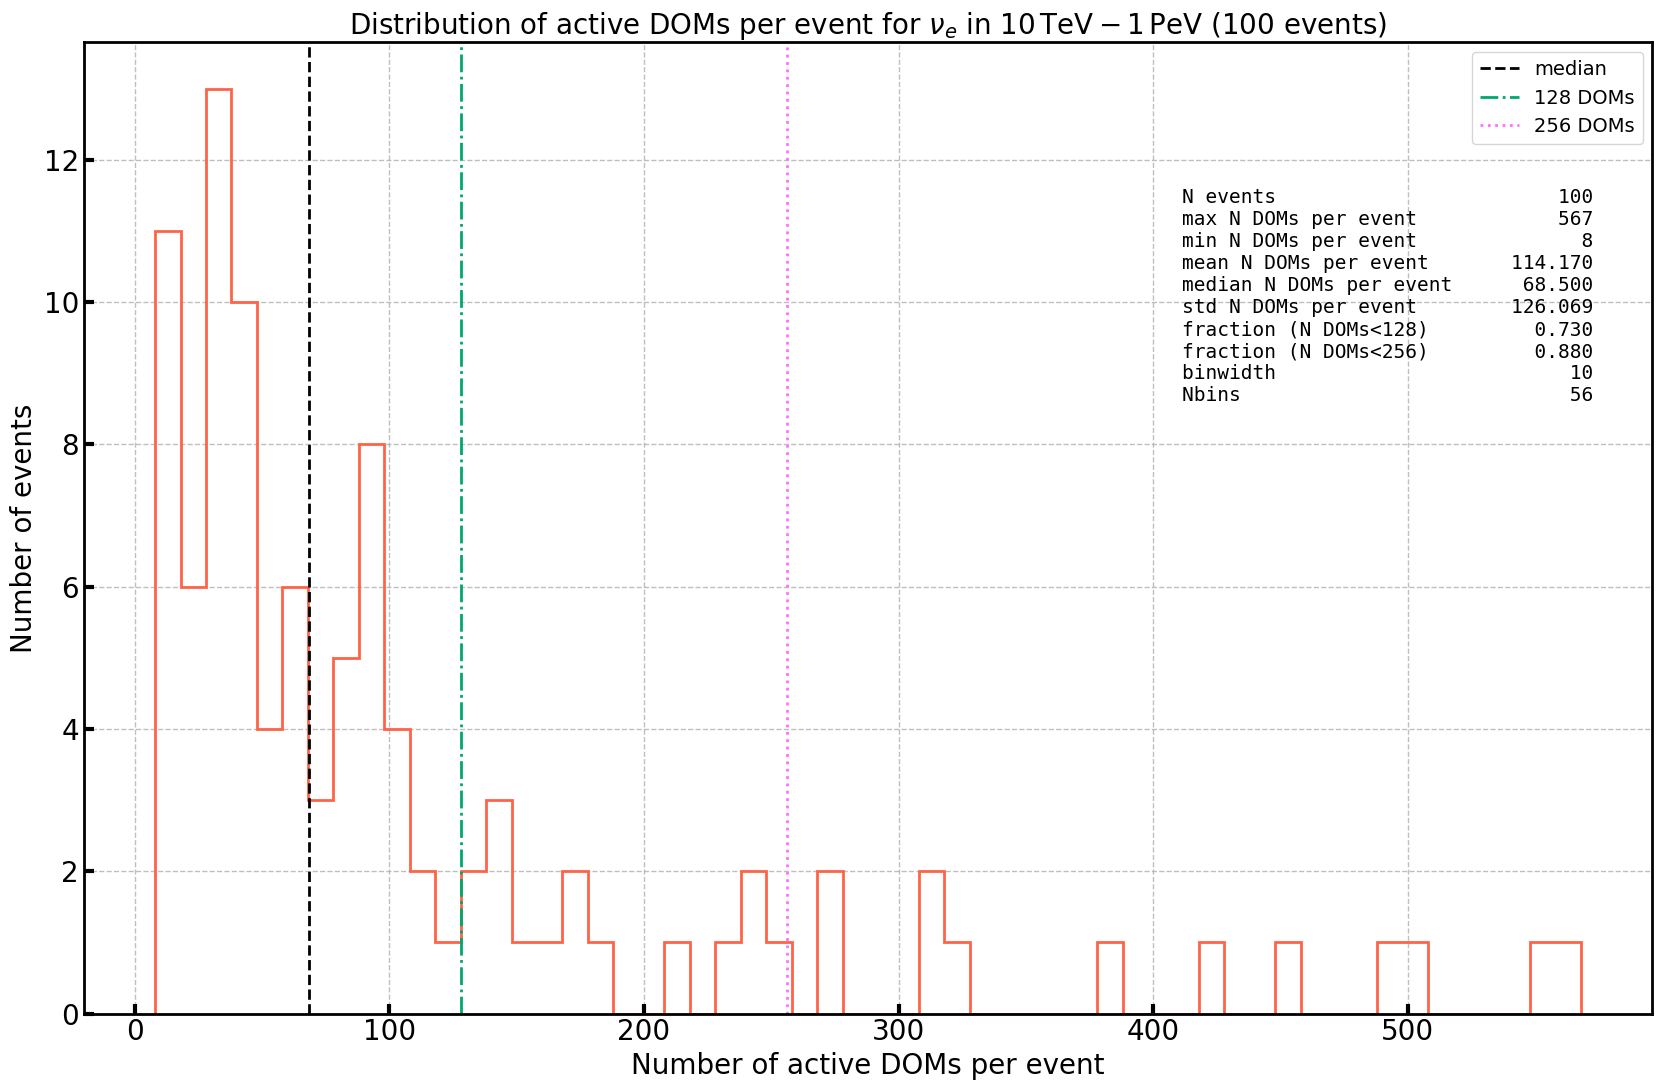

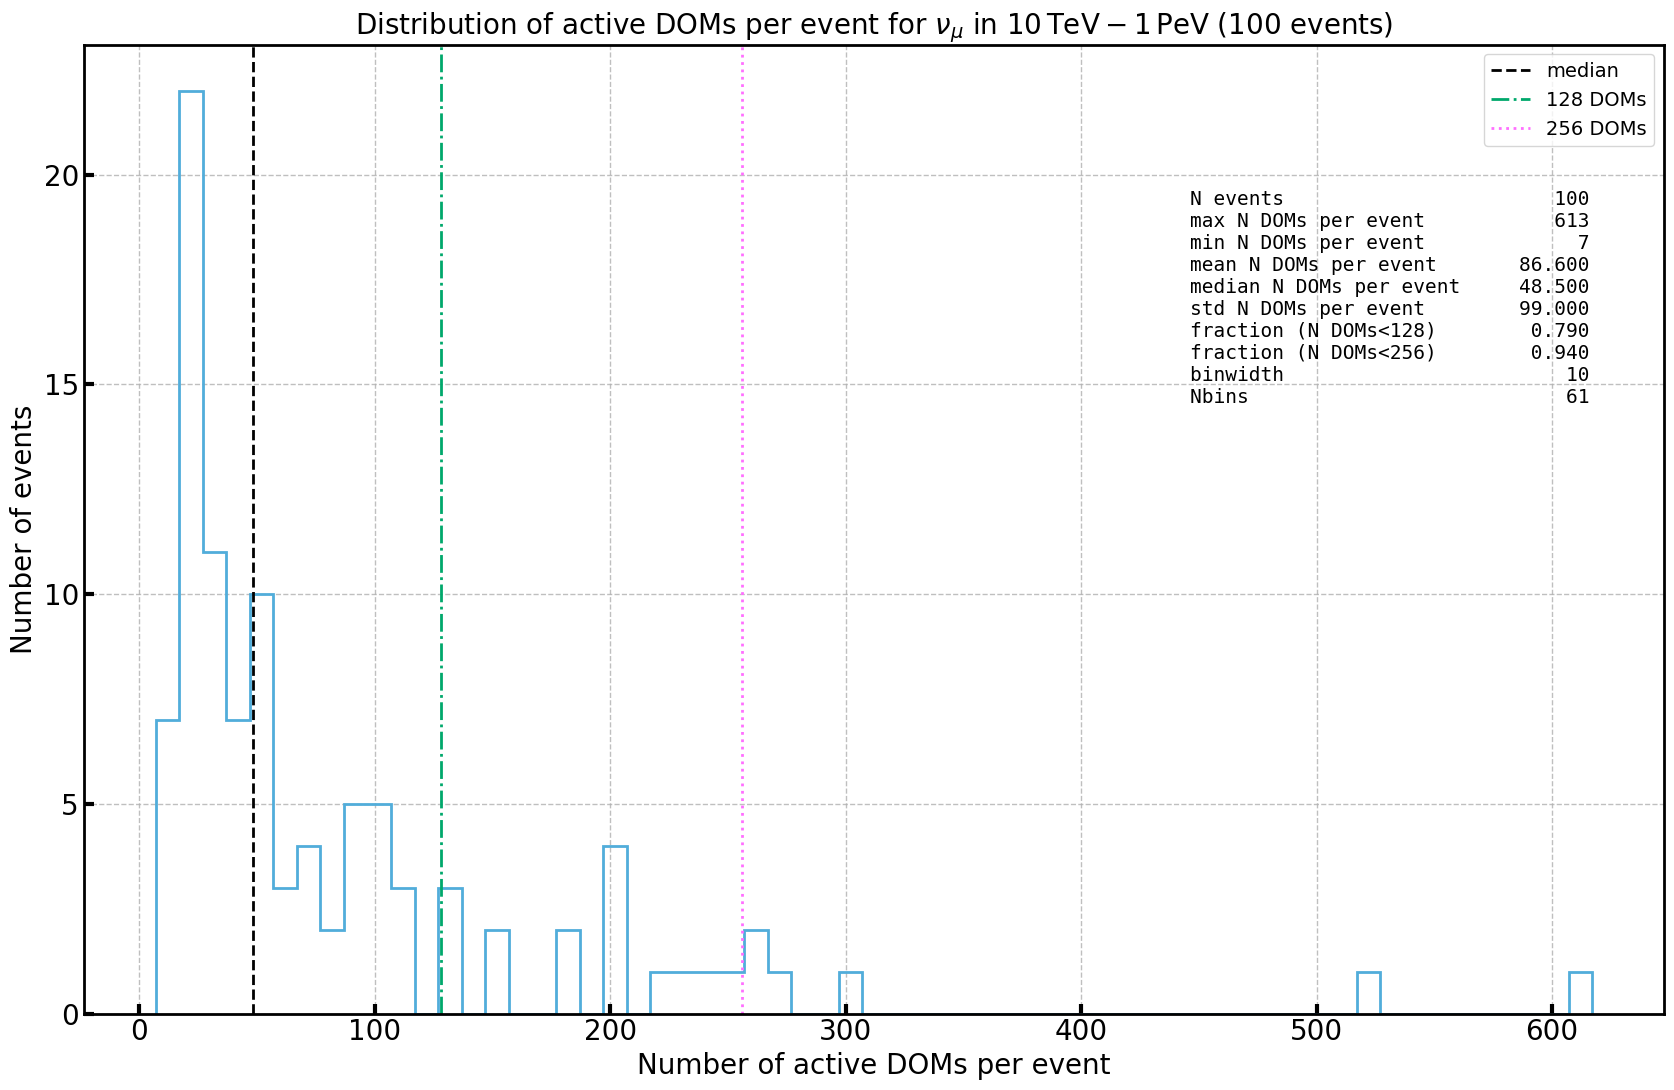

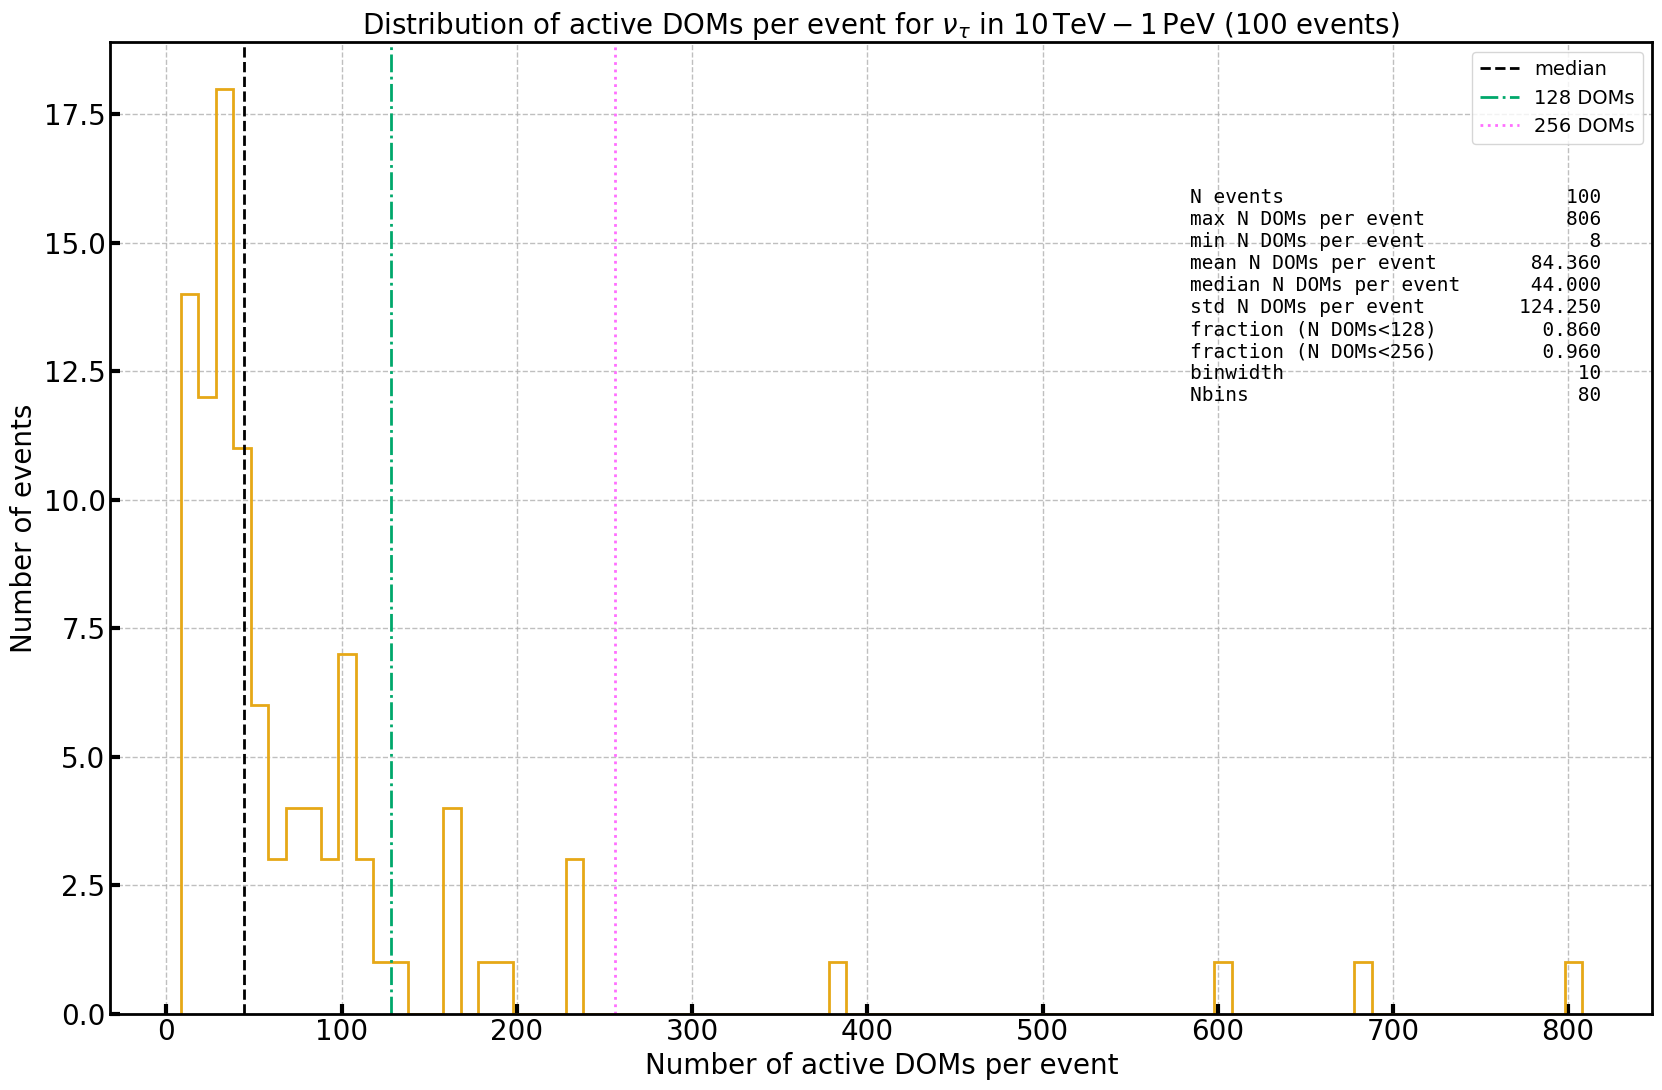

In [21]:
plot_N_DOMs_per_event(df_e_TeV, N_events=100, flavour=Flavour.E, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_N_DOMs_per_event(df_mu_TeV, N_events=100, flavour=Flavour.MU, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_N_DOMs_per_event(df_tau_TeV, N_events=100, flavour=Flavour.TAU, energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [22]:
def plot_pulse_count_distribution_single_event_per_DOM(df: pd.DataFrame,
                                               event_index: int,
                                               flavour: Flavour,
                                               energy_range: EnergyRange,
                                               min_pulses: int = 20) -> None:
    """
    Plot the distribution of number of pulses (hits) per DOM in a single event.
    Only DOMs with more than min_pulses are included.
    """
    # Choose colour
    if flavour == Flavour.E:
        colour_i = 2
    elif flavour == Flavour.MU:
        colour_i = 0
    elif flavour == Flavour.TAU:
        colour_i = 1
    else:
        raise ValueError("Flavour not recognised")

    charge_dict = get_feature_by_events(df, 'charge')
    # Get: {event_no: {(string, dom_number): [charge values]}}

    # Select the i-th event
    try:
        event_no = list(charge_dict.keys())[event_index]
        dom_charge_map = charge_dict[event_no]
    except IndexError:
        print(f"Invalid event_index: {event_index}")
        return

    # Count pulses per DOM
    pulse_counts = {
        (string, dom): len(charges)
        for (string, dom), charges in dom_charge_map.items()
        if len(charges) > min_pulses
    }

    if not pulse_counts:
        print(f"No DOMs in event {event_no} passed the minimum pulse threshold of {min_pulses}.")
        return

    counts = np.array(list(pulse_counts.values()))
    binwidth = 5
    Nbins, binwidth, bins, _, _ = getHistoParam(counts, binwidth=binwidth)

    # Plot
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(counts, bins=bins, color=getColour(colour_i), histtype='step', linewidth=2)

    ax.set_title(fr"Distribution of pulses per DOM in event {event_no} "
                 fr"(${flavour.latex}$, {energy_range.latex})", fontsize=24)
    ax.set_xlabel("Number of pulses per DOM", fontsize=16)
    ax.set_ylabel("Number of DOMs", fontsize=16)

    # Annotate
    d = {
        'Event no': event_no,
        'Total active DOMs': len(dom_charge_map),
        'DOMs plotted (>{} pulses)'.format(min_pulses): len(pulse_counts),
        'Max pulses in DOM': np.max(counts),
        'Min pulses in DOM': np.min(counts),
        'Mean pulses per DOM': np.mean(counts),
        'Median pulses per DOM': np.median(counts),
        'Std pulses per DOM': np.std(counts),
        'binwidth': binwidth,
        'Nbins': Nbins,
    }

    add_text_to_ax(0.68, 0.85, nice_string_output(d), ax, fontsize=14)

    plt.tight_layout()
    plt.show()


In [23]:
def plot_pulse_count_distribution_single_event(df: pd.DataFrame,
                                               event_index: int,
                                               flavour: Flavour,
                                               energy_range: EnergyRange) -> None:
    """
    Plot the distribution of pulse counts across all DOMs in a single event.
    All DOMs with at least one pulse are included.
    """
    # Select plotting colour based on flavour
    flavour_to_colour = {Flavour.MU: 0, Flavour.TAU: 1, Flavour.E: 2}
    colour_i = flavour_to_colour.get(flavour)
    if colour_i is None:
        raise ValueError("Flavour not recognised")

    charge_dict = get_feature_by_events(df, 'charge')

    try:
        event_no = list(charge_dict.keys())[event_index]
        dom_charge_map = charge_dict[event_no]
    except IndexError:
        print(f"Invalid event_index: {event_index}")
        return

    # Count pulses for all DOMs (at least one pulse per DOM is guaranteed)
    counts = np.array([len(charges) for charges in dom_charge_map.values()])

    binwidth = 5
    Nbins, binwidth, bins, _, _ = getHistoParam(counts, binwidth=binwidth)

    # Plot
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(counts, bins=bins, color=getColour(colour_i), histtype='step', linewidth=2)

    ax.set_title(fr"Distribution of pulses across DOMs in event {event_no} "
                 fr"(${flavour.latex}$, {energy_range.latex})", fontsize=24)
    ax.set_xlabel("Number of pulses per DOM", fontsize=16)
    ax.set_ylabel("Number of DOMs", fontsize=16)

    # Annotate
    d = {
        'Event no': event_no,
        'Active DOMs': len(dom_charge_map),
        'max N pulses in DOM': np.max(counts),
        'min N pulses in DOM': np.min(counts),
        'median N pulses per DOM': f"{np.median(counts):.0f}",
        'mean N pulses per DOM': np.mean(counts),
        'std N pulses per DOM': np.std(counts),
        'binwidth': binwidth,
        'Nbins': Nbins,
    }

    add_text_to_ax(0.68, 0.85, nice_string_output(d), ax, fontsize=14)

    plt.tight_layout()
    plt.show()


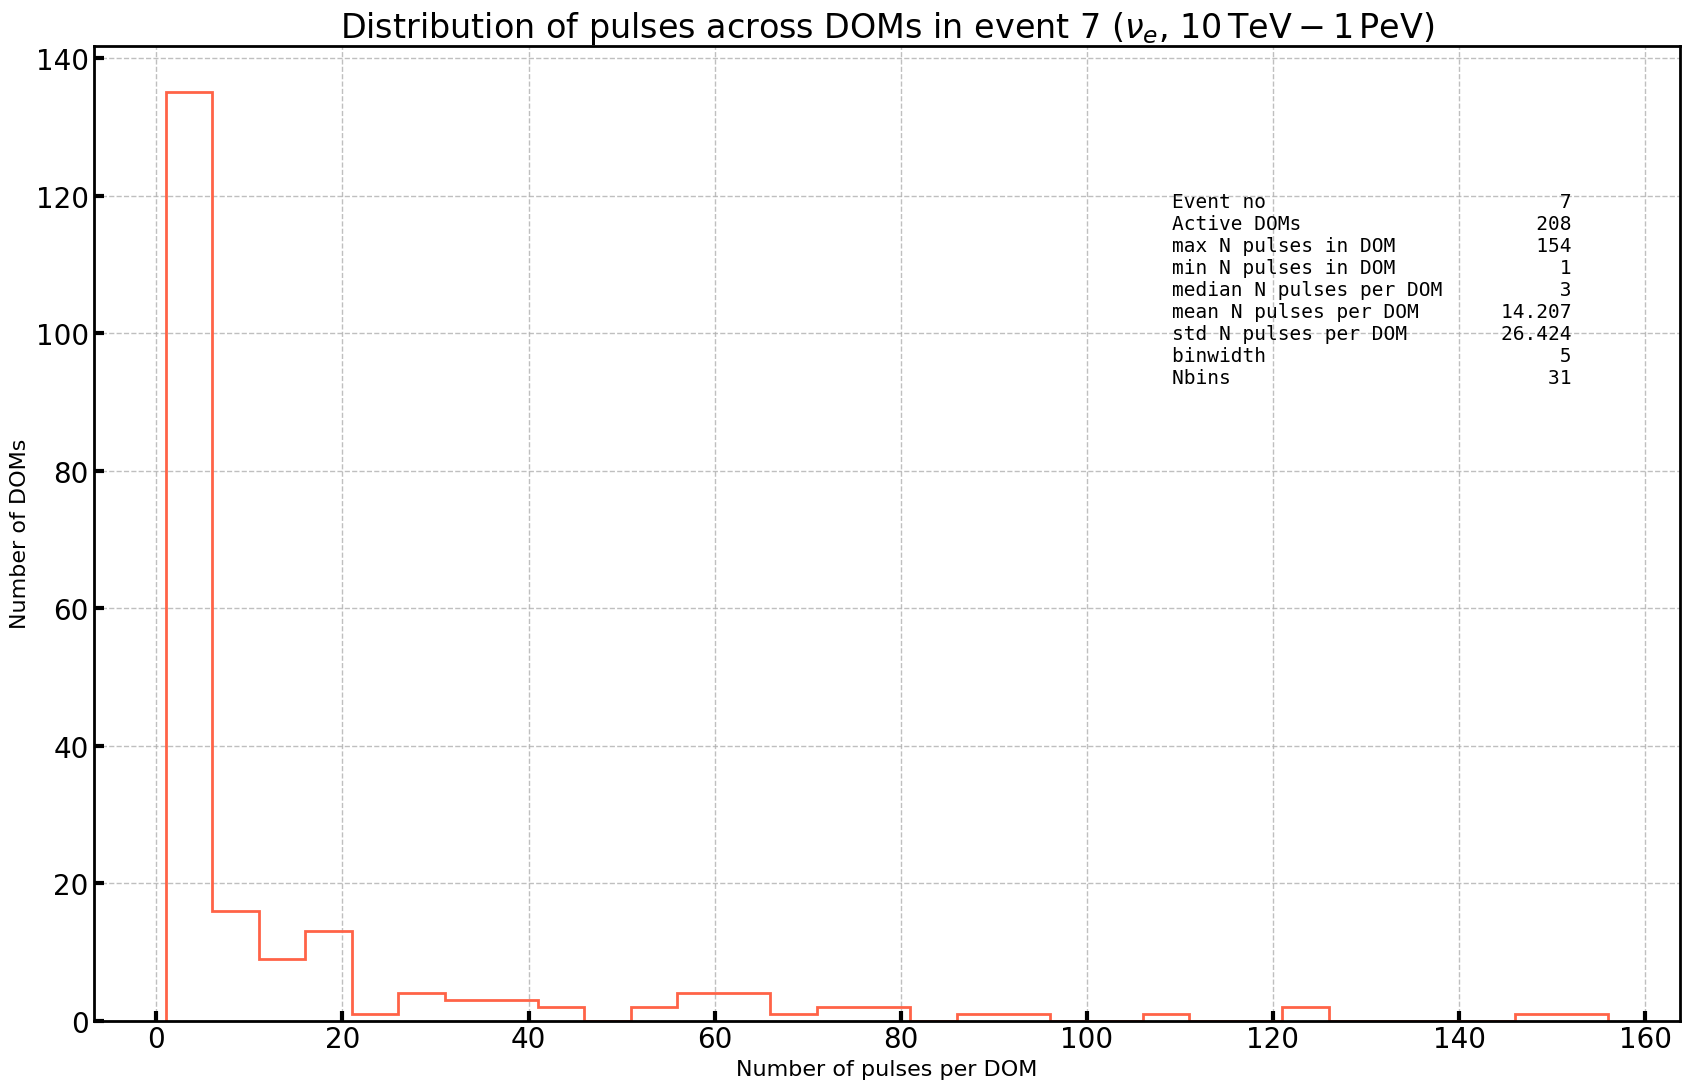

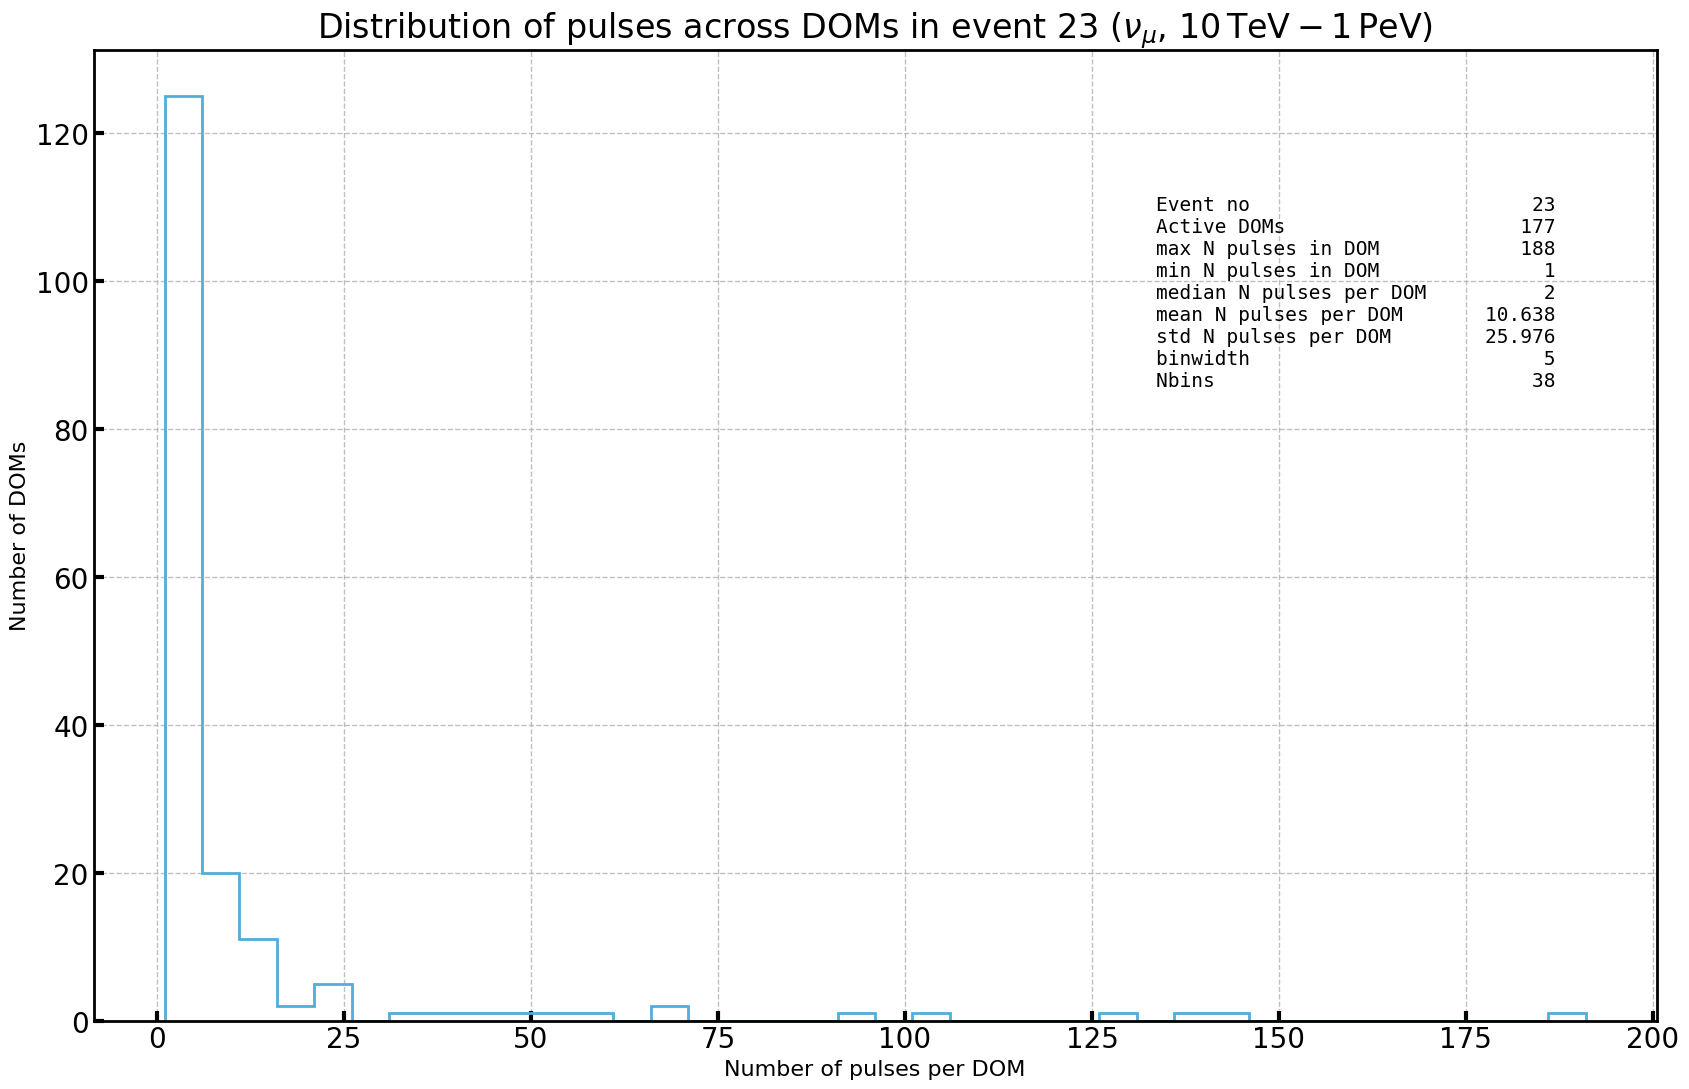

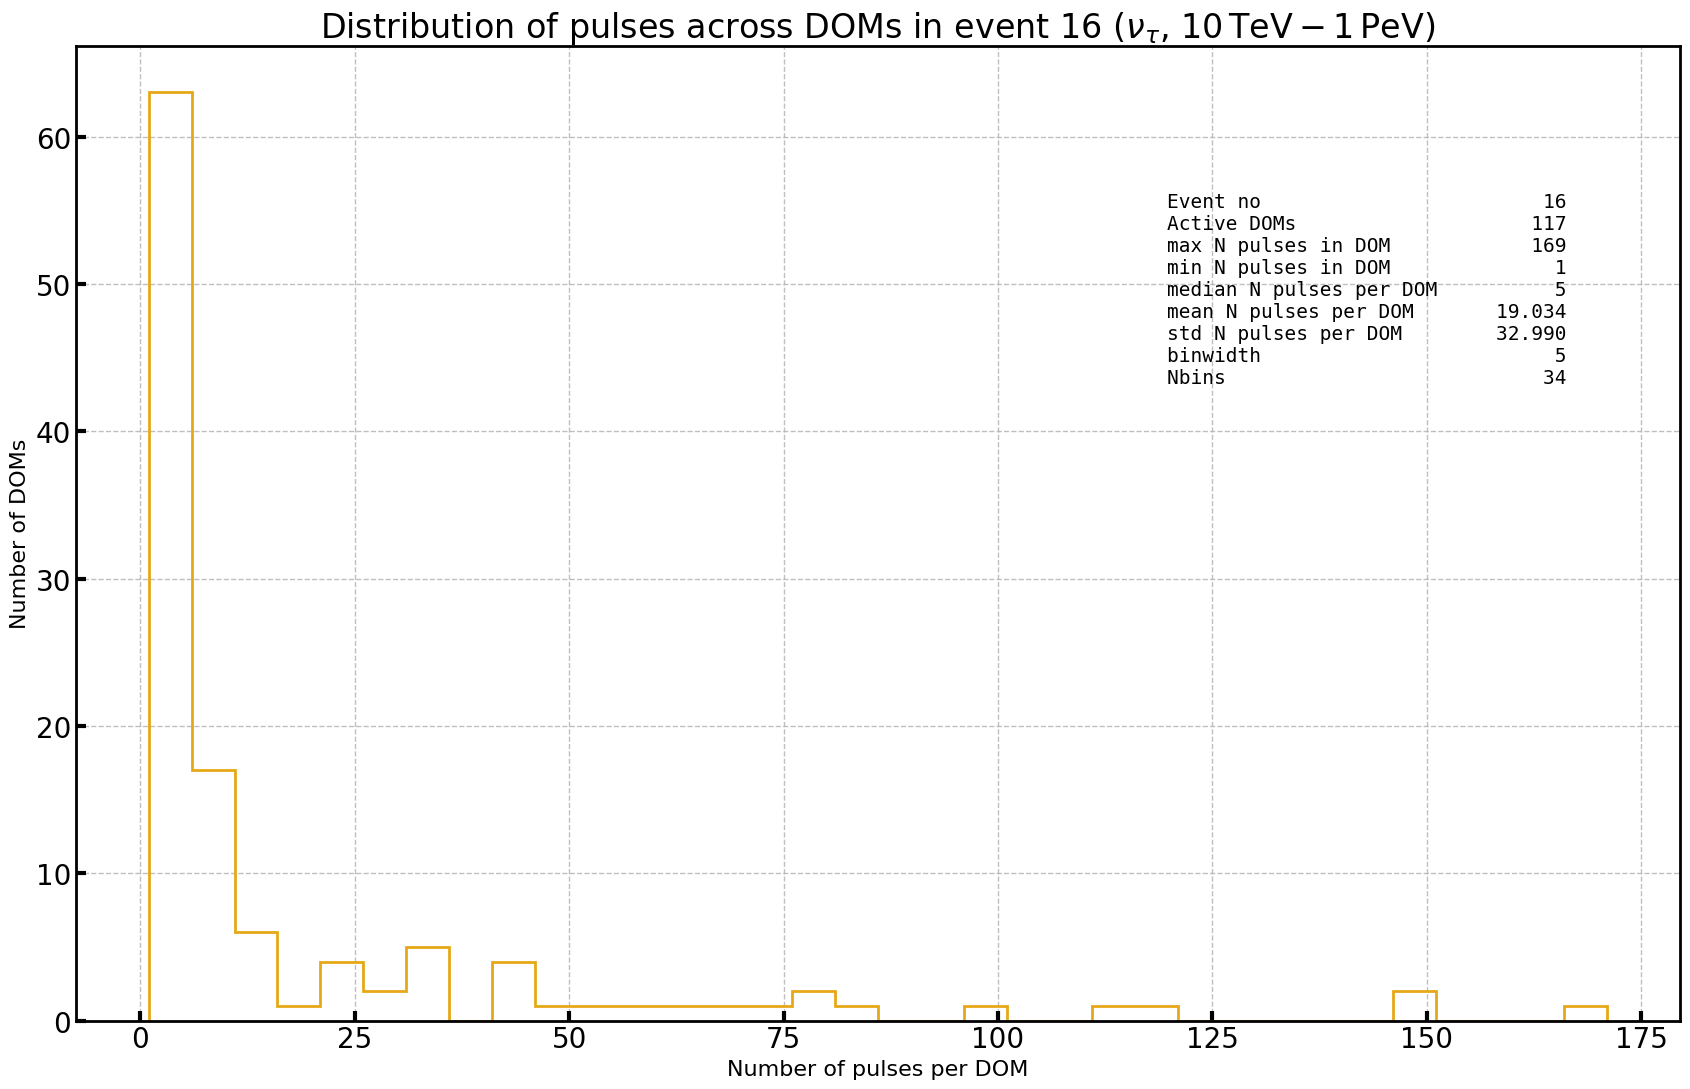

In [24]:
plot_pulse_count_distribution_single_event(df_e_TeV, event_index=7, flavour=Flavour.E, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_pulse_count_distribution_single_event(df_mu_TeV, event_index=23, flavour=Flavour.MU, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_pulse_count_distribution_single_event(df_tau_TeV, event_index=16, flavour=Flavour.TAU, energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [25]:
def plot_pulse_count_distribution_multi_event(df: pd.DataFrame,
                                              N_events: int, 
                                              flavour: Flavour, 
                                              energy_range: EnergyRange) -> None:
    """
    Plot distribution of number of pulses per DOM across multiple events.
    All DOMs with at least one pulse are included.
    """
    charge_dict = get_feature_by_events(df, 'charge')
    
    # Select plotting colour
    flavour_to_colour = {Flavour.MU: 0, Flavour.TAU: 1, Flavour.E: 2}
    colour_i = flavour_to_colour.get(flavour)
    if colour_i is None:
        raise ValueError("Flavour not recognised")

    # Collect pulse counts
    pulse_counts = []
    for i, dom_charge_map in enumerate(charge_dict.values()):
        if i >= N_events:
            break
        for charges in dom_charge_map.values():
            pulse_counts.append(len(charges))

    if not pulse_counts:
        print(f"No active DOMs found in first {N_events} events.")
        return

    counts = np.array(pulse_counts)
    binwidth = 5
    Nbins, binwidth, bins, _, _ = getHistoParam(counts, binwidth=binwidth)

    # Plot
    fig, ax = plt.subplots(figsize=(17, 11))
    ax.hist(counts, bins=bins, color=getColour(colour_i), histtype='step', linewidth=2)

    ax.set_title(fr"Distribution of pulses across DOMs in {N_events} events "
                 fr"(${flavour.latex}$, {energy_range.latex})", fontsize=24)
    ax.set_xlabel("Number of pulses per DOM", fontsize=16)
    ax.set_ylabel("Number of DOMs", fontsize=16)

    # Annotate
    d = {
        'Total events': N_events,
        'Total active DOMs': len(counts),
        'Active DOMs per event': f"{len(counts) / N_events:.2f}",
        'max N pulses in DOM': np.max(counts),
        'min N pulses in DOM': np.min(counts),
        'median N pulses per DOM': f"{np.median(counts):.0f}",
        'mean N pulses per DOM': np.mean(counts),
        'std N pulses per DOM': np.std(counts),
        'binwidth': binwidth,
        'Nbins': Nbins,
    }

    add_text_to_ax(0.68, 0.85, nice_string_output(d), ax, fontsize=14)

    plt.tight_layout()
    plt.show()


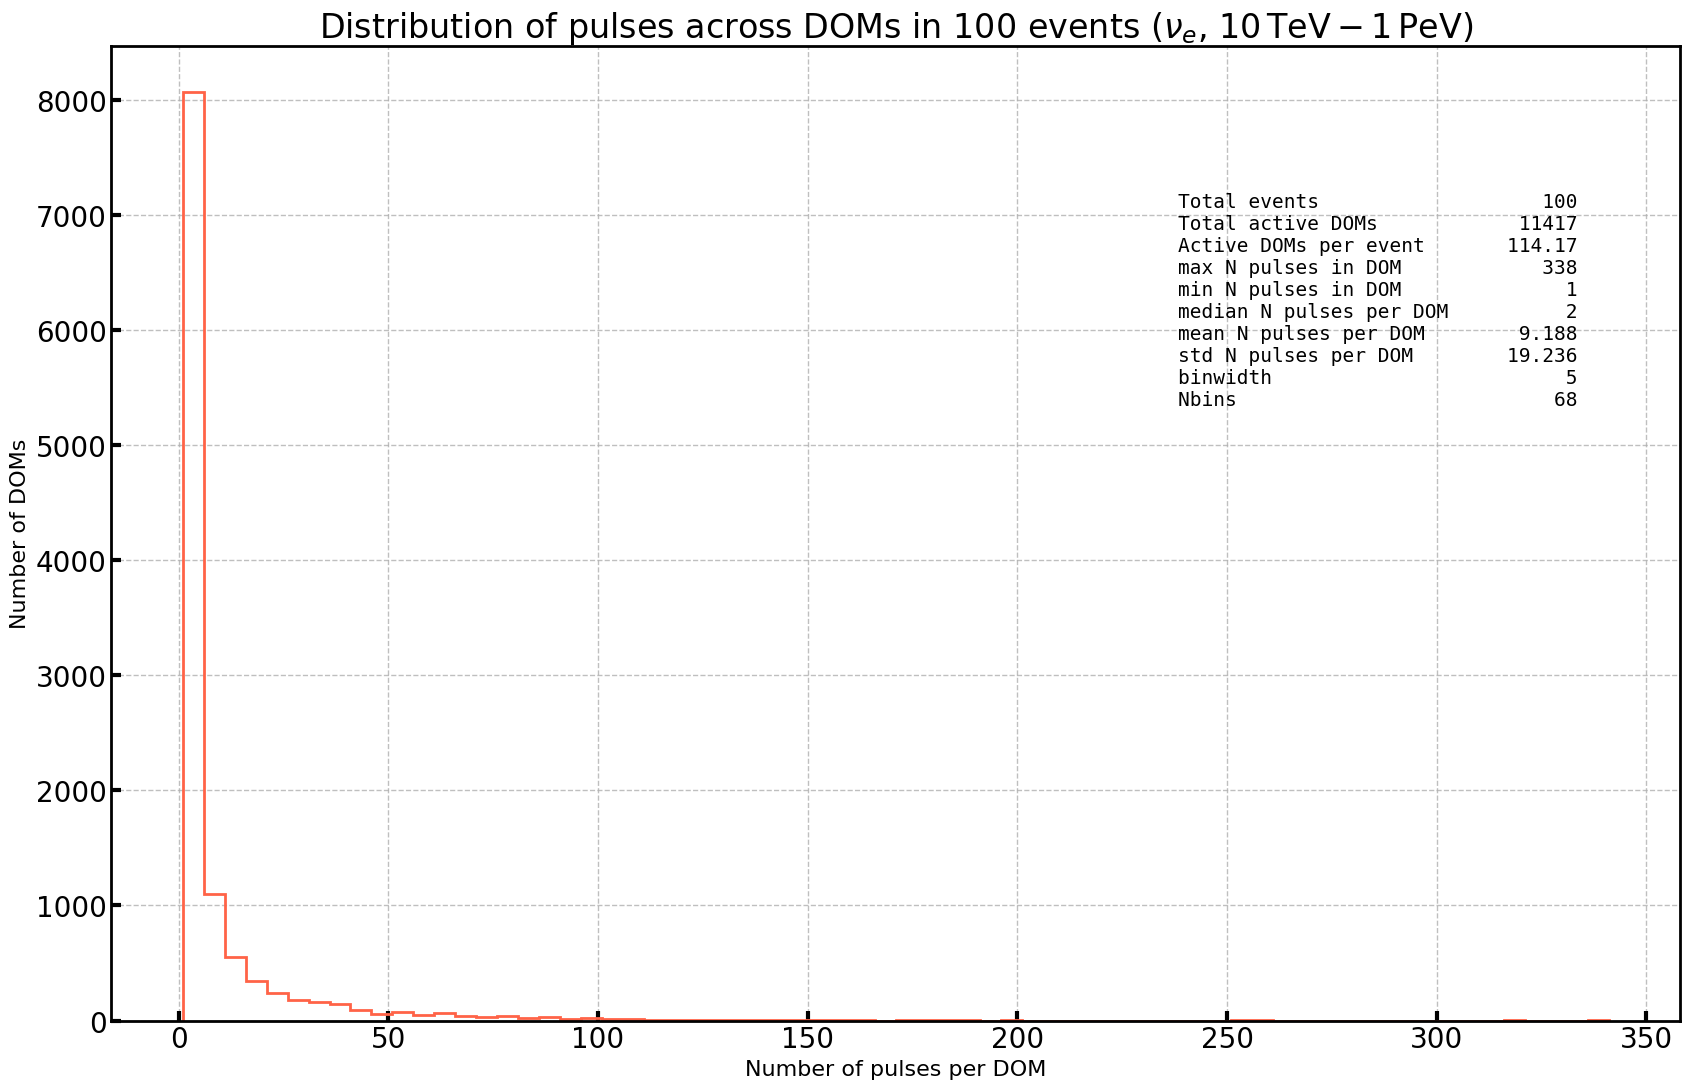

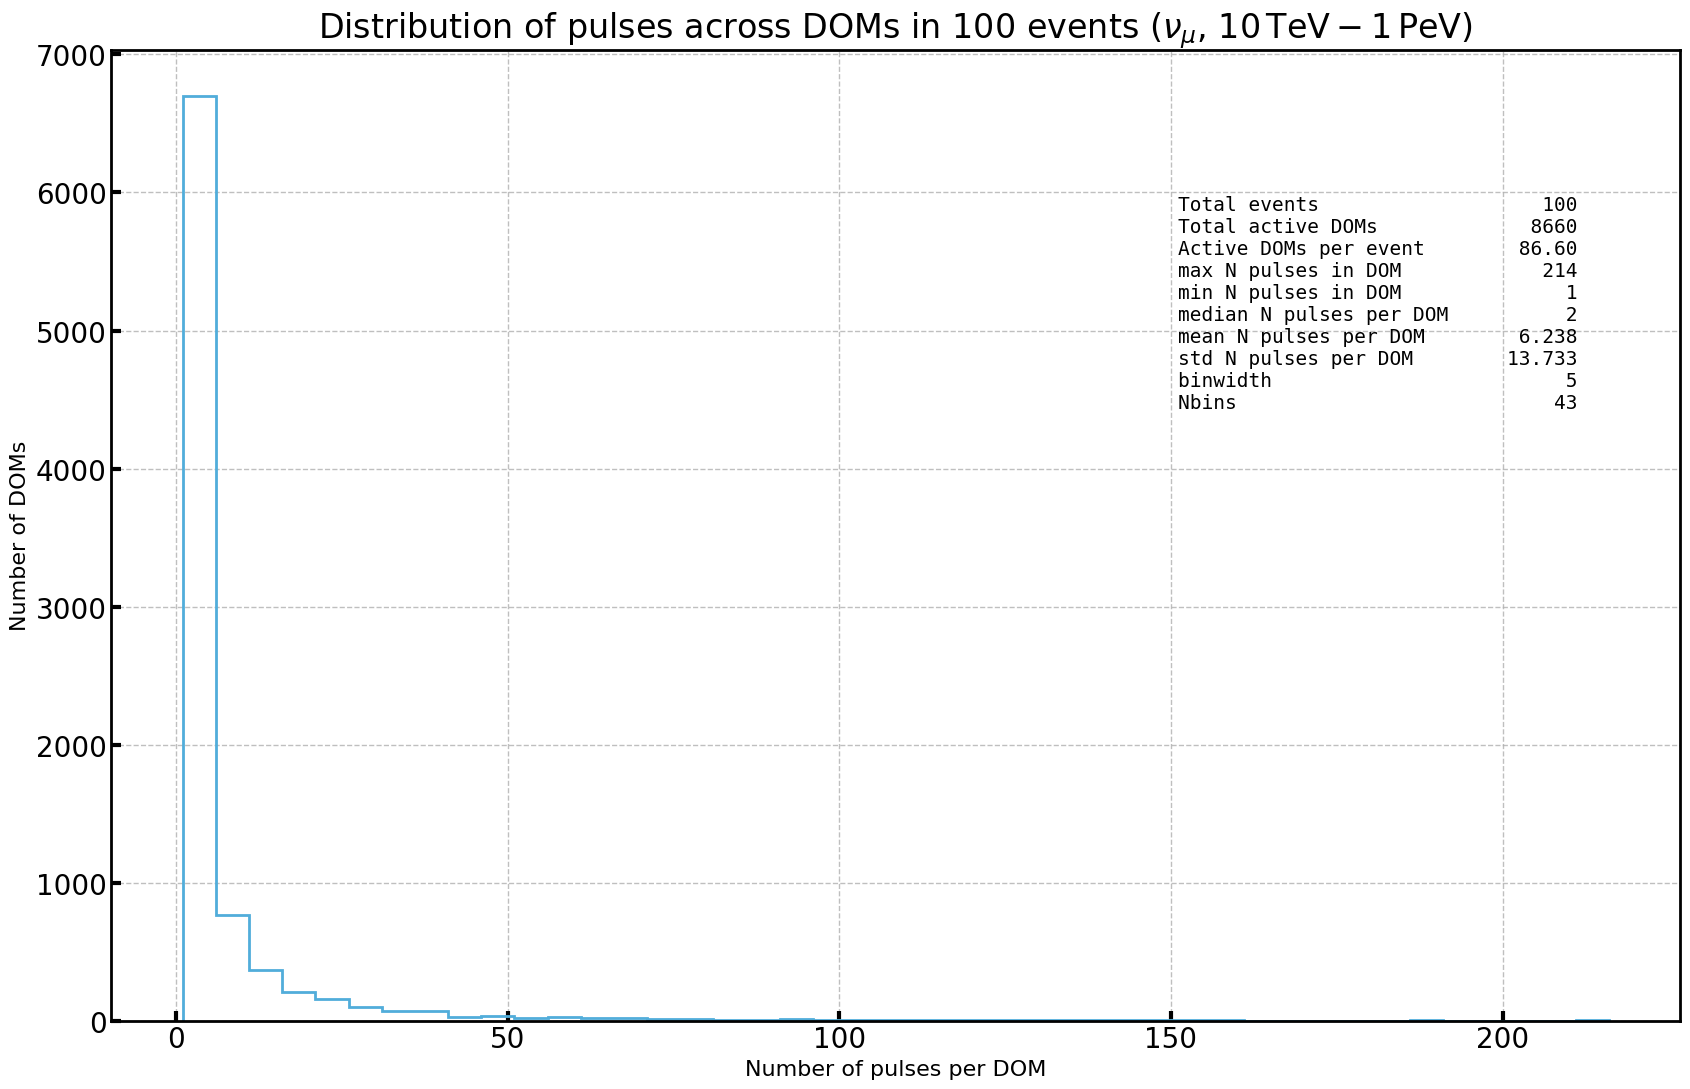

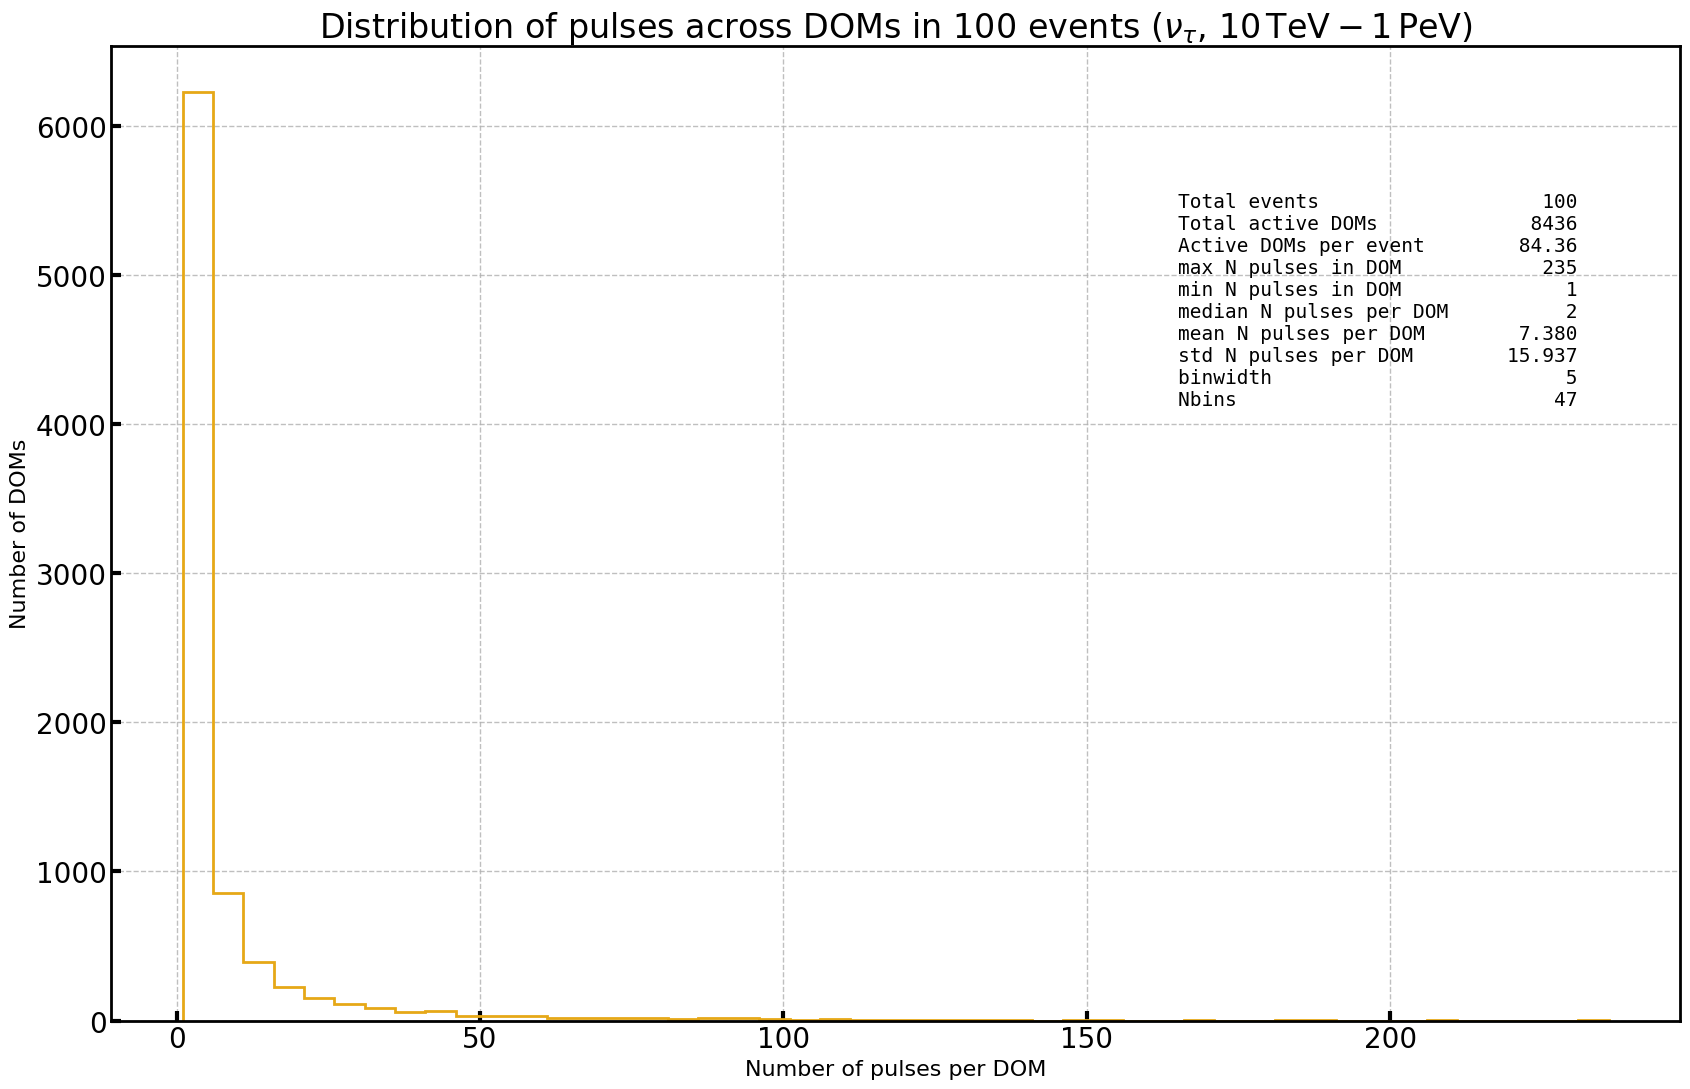

In [26]:
plot_pulse_count_distribution_multi_event(df_e_TeV, N_events=100, flavour=Flavour.E, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_pulse_count_distribution_multi_event(df_mu_TeV, N_events=100, flavour=Flavour.MU, energy_range=EnergyRange.ER_10_TEV_1_PEV)
plot_pulse_count_distribution_multi_event(df_tau_TeV, N_events=100, flavour=Flavour.TAU, energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [27]:
def plot_DOM_activation_multi_event(df: pd.DataFrame,
                        N_events: int, 
                        flavour: Flavour, 
                        energy_range: EnergyRange) -> None:
    """
    Visualise DOM activation over N events as a heatmap.
    Y-axis: dom_number (1 at top), X-axis: string (1 to 86)
    Colour: Number of charge entries (activation intensity)
    """
    # Get: {event_no: {(string, dom_number): [charge values]}}
    charge_dict = get_feature_by_events(df, 'charge')

    # Aggregate counts across N_events
    activation = {}  # {(string, dom_number): total_count}
    for i, event_data in enumerate(charge_dict.values()):
        if i >= N_events:
            break
        for (string, dom), charges in event_data.items():
            activation[(string, dom)] = activation.get((string, dom), 0) + len(charges)

    # Initialise grid: 60 rows (DOMs), 86 cols (strings)
    grid = np.zeros((60, 86), dtype=int)
    for (string, dom), count in activation.items():
        s = int(string)
        d = int(dom)
        if 1 <= s <= 86 and 1 <= d <= 60:
            grid[60 - d, s - 1] = count


    # Plot heatmap
    fig, ax = plt.subplots(figsize=(24, 18))
    im = ax.imshow(grid, cmap='YlGnBu', aspect='auto')

    ax.set_title(fr"DOM Activation Heatmap over {N_events} events of ${flavour.latex}$ in {energy_range.latex}")
    ax.set_xlabel("String Number")
    ax.set_ylabel("DOM Number")
    ax.set_xticks(np.arange(0, 86, 5))
    ax.set_yticks(np.arange(0, 60, 5))
    ax.set_yticklabels([str(i) for i in range(60, 0, -5)])
    ax.invert_yaxis()

    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(f"Cummulative numbers of pulses of {N_events} events")

    plt.tight_layout()
    plt.show()


In [28]:
# plot_DOM_activation_multi_event(df_e_TeV, N_events=1, flavour=Flavour.E, energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [29]:
# plot_DOM_activation_multi_event(df_mu_TeV, N_events=1, flavour=Flavour.MU, energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [30]:
def plot_DOM_activation_individual_event(df: pd.DataFrame,
                                         N_events: int, 
                                         flavour: Flavour, 
                                         energy_range: EnergyRange) -> None:
    """
    Plot individual DOM activation maps for the first N events.
    """
    charge_dict = get_feature_by_events(df, 'charge')
    # {event_no: {(string, dom_number): [charge values]}}

    for i, (event_no, dom_data) in enumerate(charge_dict.items()):
        if i >= N_events:
            break
        
        grid = np.zeros((60, 86), dtype=int)
        for (string, dom), charges in dom_data.items():
            s = int(string)
            d = int(dom)
            if 1 <= s <= 86 and 1 <= d <= 60:
                grid[60 - d, s - 1] = len(charges)

        # Plot heatmap
        fig, ax = plt.subplots(figsize=(24, 18))
        im = ax.imshow(grid, cmap='YlGnBu', aspect='auto')

        ax.set_title(fr"DOM Activation Heatmap for event {event_no} of ${flavour.latex}$ in {energy_range.latex}")
        ax.set_xlabel("String Number")
        ax.set_ylabel("DOM Number")
        ax.set_xticks(np.arange(0, 86, 5))
        ax.set_yticks(np.arange(0, 60, 5))
        ax.set_yticklabels([str(i) for i in range(60, 0, -5)])
        ax.invert_yaxis()

        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label("Number of Pulses (Charge Hits)")

        plt.tight_layout()
        plt.show()


In [31]:
# plot_DOM_activation_individual_event(df_e_TeV, 
#                                      N_events=1, 
#                                      flavour=Flavour.E, 
#                                      energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [32]:
# plot_DOM_activation_individual_event(df_mu_TeV, 
#                                      N_events=1, 
#                                      flavour=Flavour.MU, 
#                                      energy_range=EnergyRange.ER_10_TEV_1_PEV)

In [33]:
def get_elapsed_time_until_charge_fraction(charge_list, time_list, p1=10, p2=50):
    _fillIncomplete = -1.0
    if len(charge_list) < 2:
        return _fillIncomplete, _fillIncomplete

    # Sort by time
    sorted_indices = np.argsort(time_list)
    charges = np.array(charge_list)[sorted_indices]
    times = np.array(time_list)[sorted_indices]

    Qtotal = np.sum(charges)
    cumulated = np.cumsum(charges)

    idx1 = np.searchsorted(cumulated, p1 / 100 * Qtotal, side="right")
    idx2 = np.searchsorted(cumulated, p2 / 100 * Qtotal, side="right")

    T1 = times[idx1] - times[0] if idx1 < len(times) else _fillIncomplete
    T2 = times[idx2] - times[0] if idx2 < len(times) else _fillIncomplete

    return T1, T2


def get_accumulated_charge_after_ns(charge_list, time_list, ns1=25, ns2=75):
    _fillIncomplete = -1.0
    if len(charge_list) < 1:
        return _fillIncomplete, _fillIncomplete, _fillIncomplete

    t0 = time_list[0]
    time_offsets = np.array(time_list) - t0
    charges = np.array(charge_list)

    Q1 = np.sum(charges[time_offsets < ns1])
    Q2 = np.sum(charges[time_offsets < ns2])
    Qtotal = np.sum(charges)

    return Q1, Q2, Qtotal


In [36]:
def plot_charge_time_single_event_by_DOM(df: pd.DataFrame,
                                         event_index: int, 
                                         flavour: Flavour, 
                                         energy_range: EnergyRange,
                                         N_pulses_cut: int = 150) -> None:
    """
    Visualise charge vs time scatter plots for all DOMs in a selected event.
    Each figure shows one DOM's hits.
    """
    # Assign colour based on flavour
    if flavour == Flavour.E:
        colour_i = 2
    elif flavour == Flavour.MU:
        colour_i = 0
    elif flavour == Flavour.TAU:
        colour_i = 1
    else:
        raise ValueError("Flavour not recognised")

    # Get grouped data
    charge_dict = get_feature_by_events(df, 'charge')
    time_dict = get_feature_by_events(df, 'dom_time')
    # {event_no: {(string, dom_number): [values]}}
    
    # Select the i-th event
    try:
        event_no = list(charge_dict.keys())[event_index]
        charge_map = charge_dict[event_no]
        time_map = time_dict[event_no]
    except IndexError:
        print(f"Invalid event_index: {event_index}")
        return

    # Plot per DOM
    print(f" {len(charge_map)} active DOMs in event {event_no}")
    for (string, dom) in charge_map:
        charge_list = charge_map[(string, dom)]
        time_list = time_map.get((string, dom), [])
        if len(charge_list) != len(time_list):
            continue
        if len(charge_list) > N_pulses_cut:
            fig, ax = plt.subplots(figsize=(14, 9))
            colour = getColour(colour_i)
            ax.vlines(time_list, 0, charge_list, color=colour, linewidth=2,zorder=1)
            ax.scatter(time_list, charge_list, s=30, color=colour, edgecolor='black', linewidth=1, zorder=2)

            ax.set_title(fr"Charge vs Arrivel Time for (string{string:.0f}, DOM{dom:.0f}) in event {event_no} of ${flavour.latex}$ in {energy_range.latex}")
            ax.set_xlabel("Arrival time (ns)")
            ax.set_ylabel("Charge")
            d = {
                'N pulses': len(charge_list),
                'max charge': max(charge_list),
                'min charge': min(charge_list),
                'median charge': np.median(charge_list),
                'mean charge': np.mean(charge_list),
                'max time': f"{max(time_list):.0f}",
                'min time': f"{min(time_list):.0f}",
                'median time': f"{np.median(time_list):.0f}",
                'mean time': np.mean(time_list),
            }
            d_first ={
                '(t1,q1)' : f"({time_list[0]:.0f}, {charge_list[0]:.3f})",
                '(t2,q2)' : f"({time_list[1]:.0f}, {charge_list[1]:.3f})",
                '(t3,q3)' : f"({time_list[2]:.0f}, {charge_list[2]:.3f})",
                '(t4,q4)' : f"({time_list[3]:.0f}, {charge_list[3]:.3f})",
                '(t5,q5)' : f"({time_list[4]:.0f}, {charge_list[4]:.3f})",
            }
            T10, T50 = get_elapsed_time_until_charge_fraction(charge_list, time_list)
            Q25, Q75, Qtotal = get_accumulated_charge_after_ns(charge_list, time_list)
            d_quantiles = {
                r'$T_{10\%}$':f"{T10:.0f}",
                r'$T_{50\%}$':f"{T50:.0f}",
                r'$\sigma_T $  ':f"{np.std(time_list):.3f}",
                r"$Q_{0-25ns}$":f"{Q25:.3f}",
                r"$Q_{0-75ns}$":f"{Q75:.3f}",
                r"$Q_{\infty}$" :f"{Qtotal:.3f}",
                }
            add_text_to_ax(0.60, 0.95, nice_string_output(d), ax, fontsize=14)
            add_text_to_ax(0.50, 0.65, nice_string_output(d_first), ax, fontsize=14)
            add_text_to_ax(0.80, 0.65, nice_string_output(d_quantiles), ax, fontsize=14)
            plt.tight_layout()
            plt.show()


 208 active DOMs in event 7


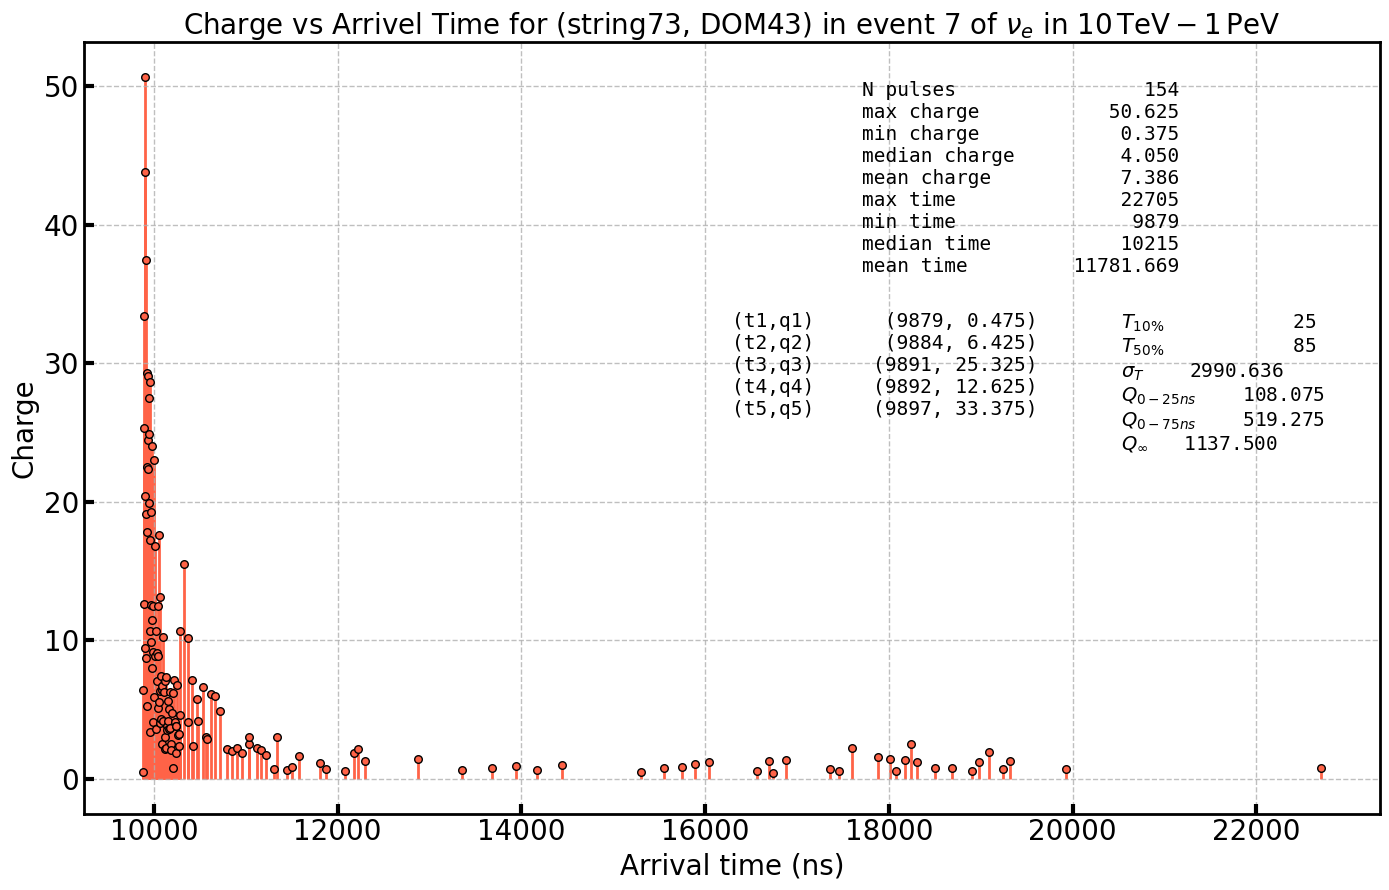

In [37]:
plot_charge_time_single_event_by_DOM(df_e_TeV,
                                  event_index=7, 
                                  flavour=Flavour.E, 
                                  energy_range=EnergyRange.ER_10_TEV_1_PEV)

 177 active DOMs in event 23


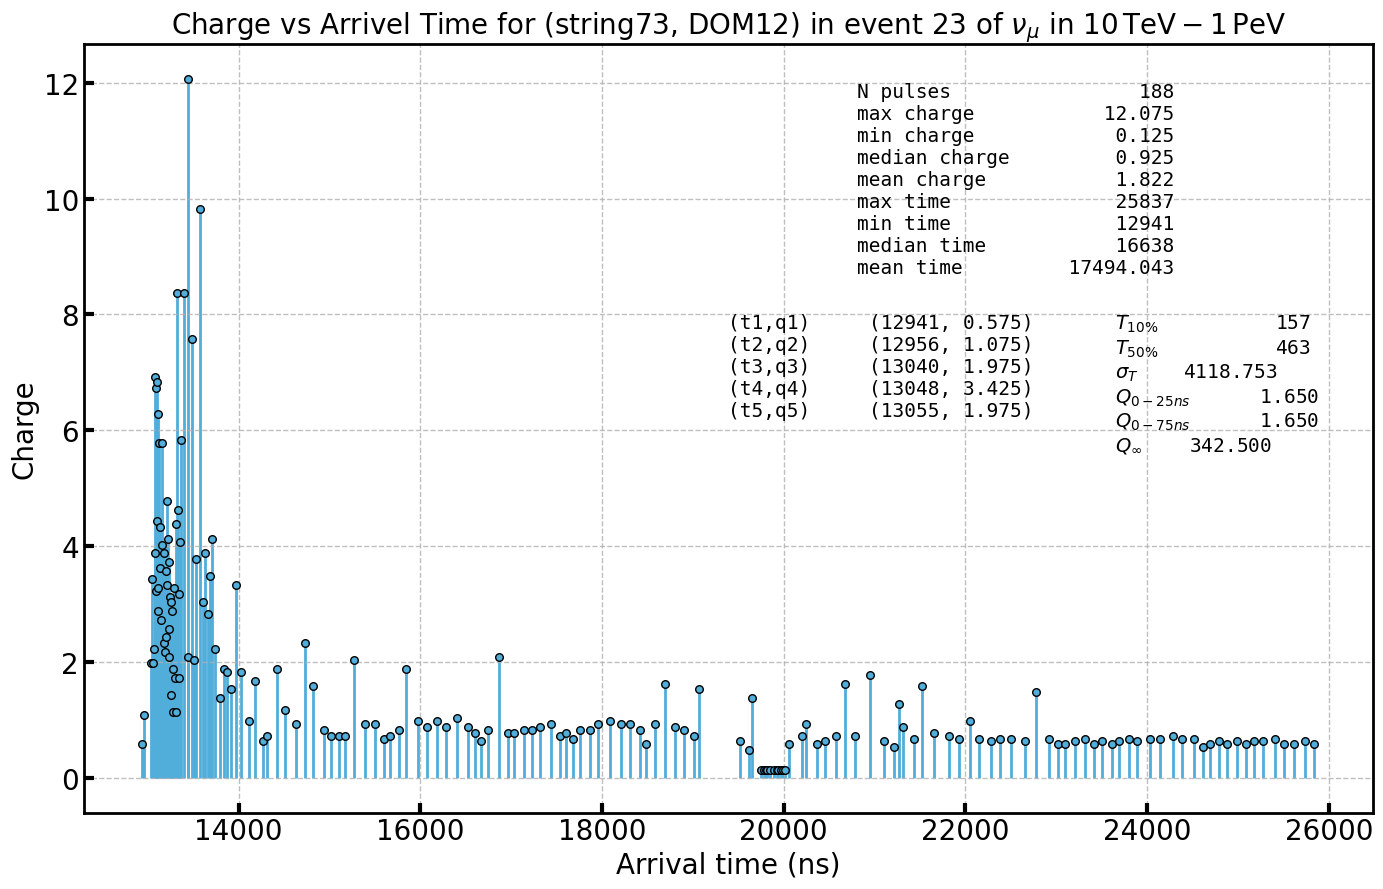

In [38]:
plot_charge_time_single_event_by_DOM(df_mu_TeV,
                                  event_index=23, # 16
                                  flavour=Flavour.MU, 
                                  energy_range=EnergyRange.ER_10_TEV_1_PEV)

 117 active DOMs in event 16


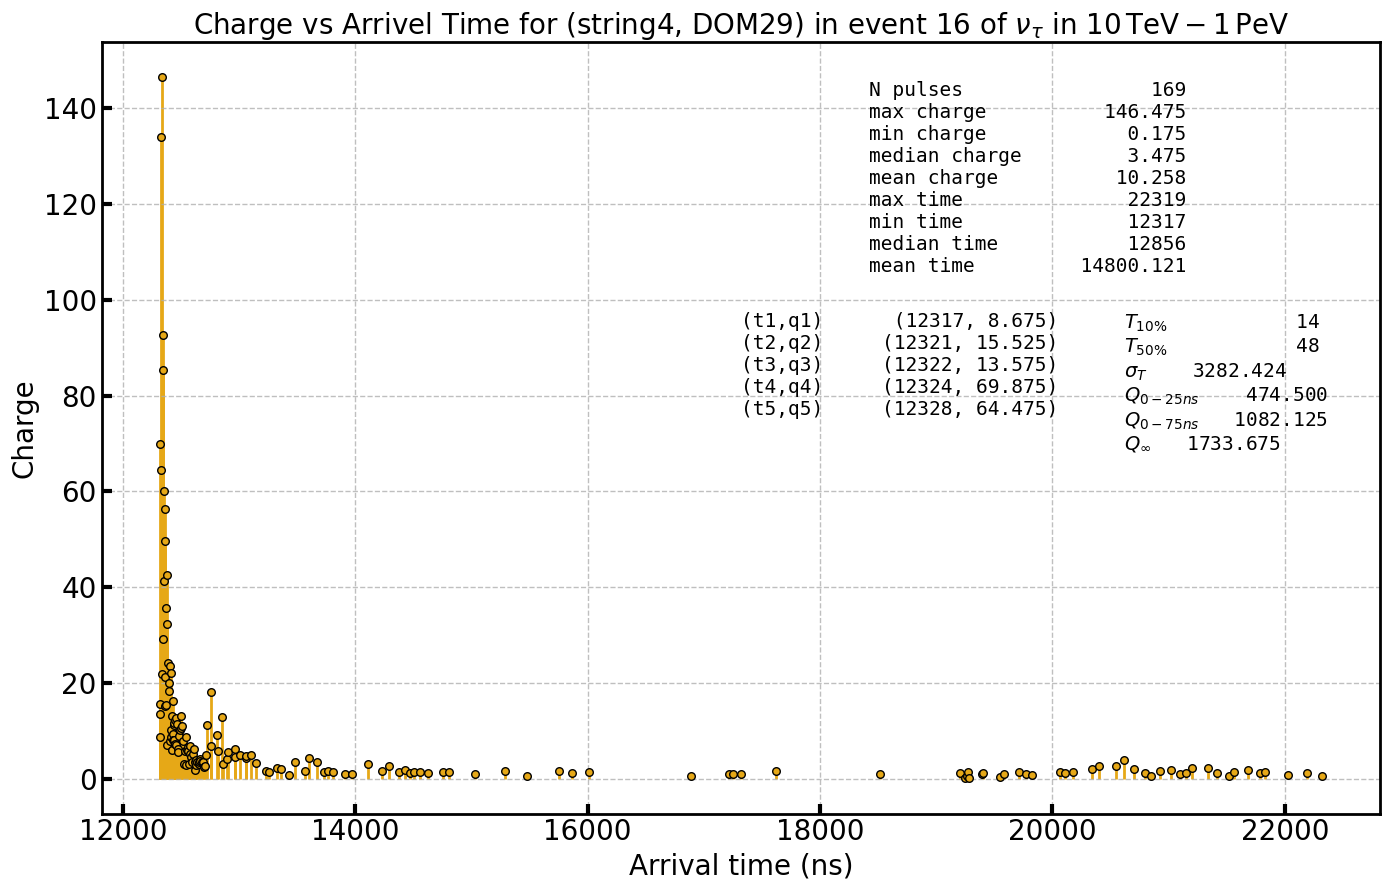

In [39]:
plot_charge_time_single_event_by_DOM(df_tau_TeV,
                                  event_index=16, #10
                                  flavour=Flavour.TAU, 
                                  energy_range=EnergyRange.ER_10_TEV_1_PEV)

 161 active DOMs in event 16


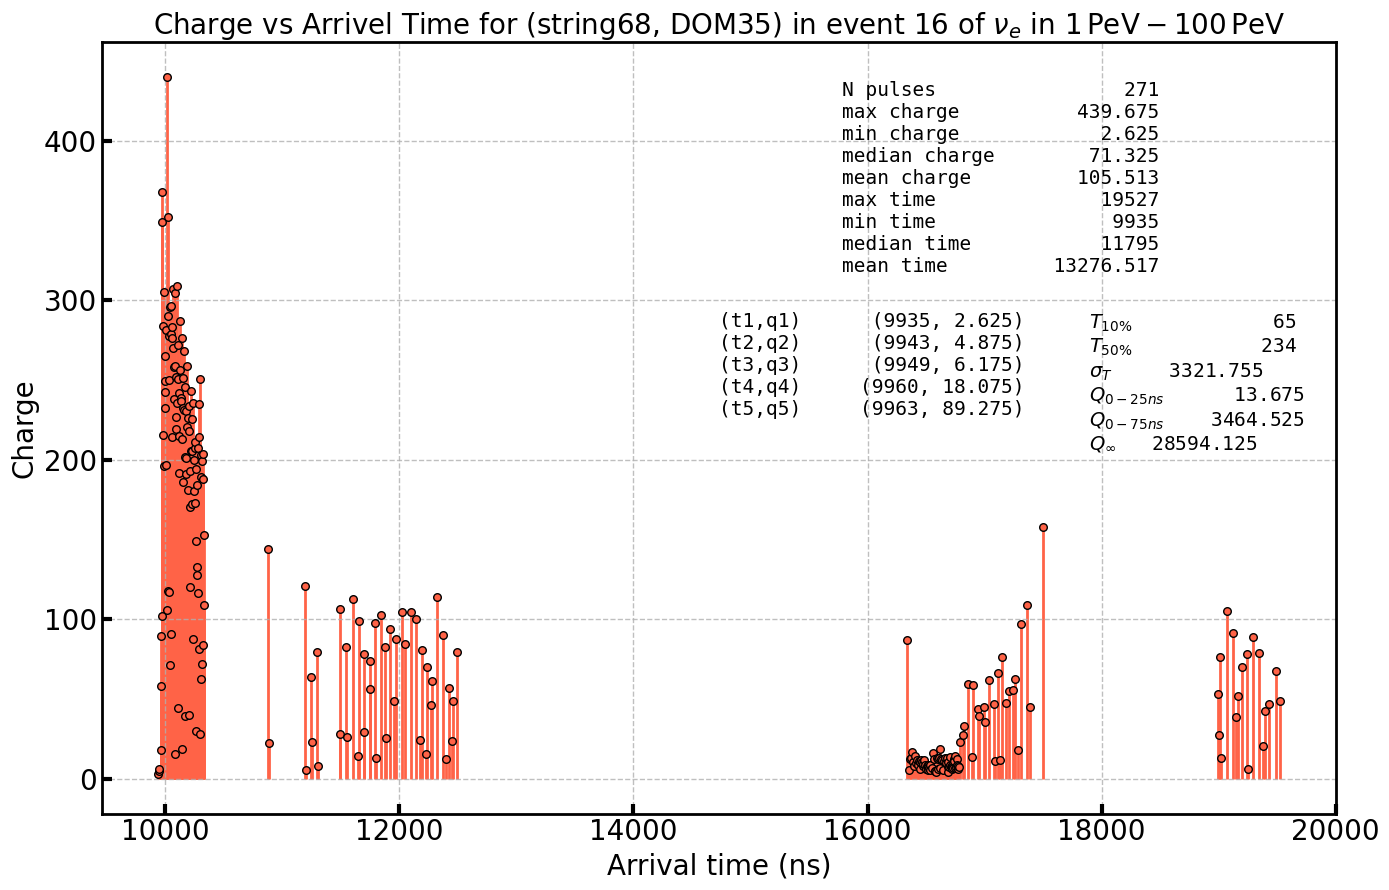

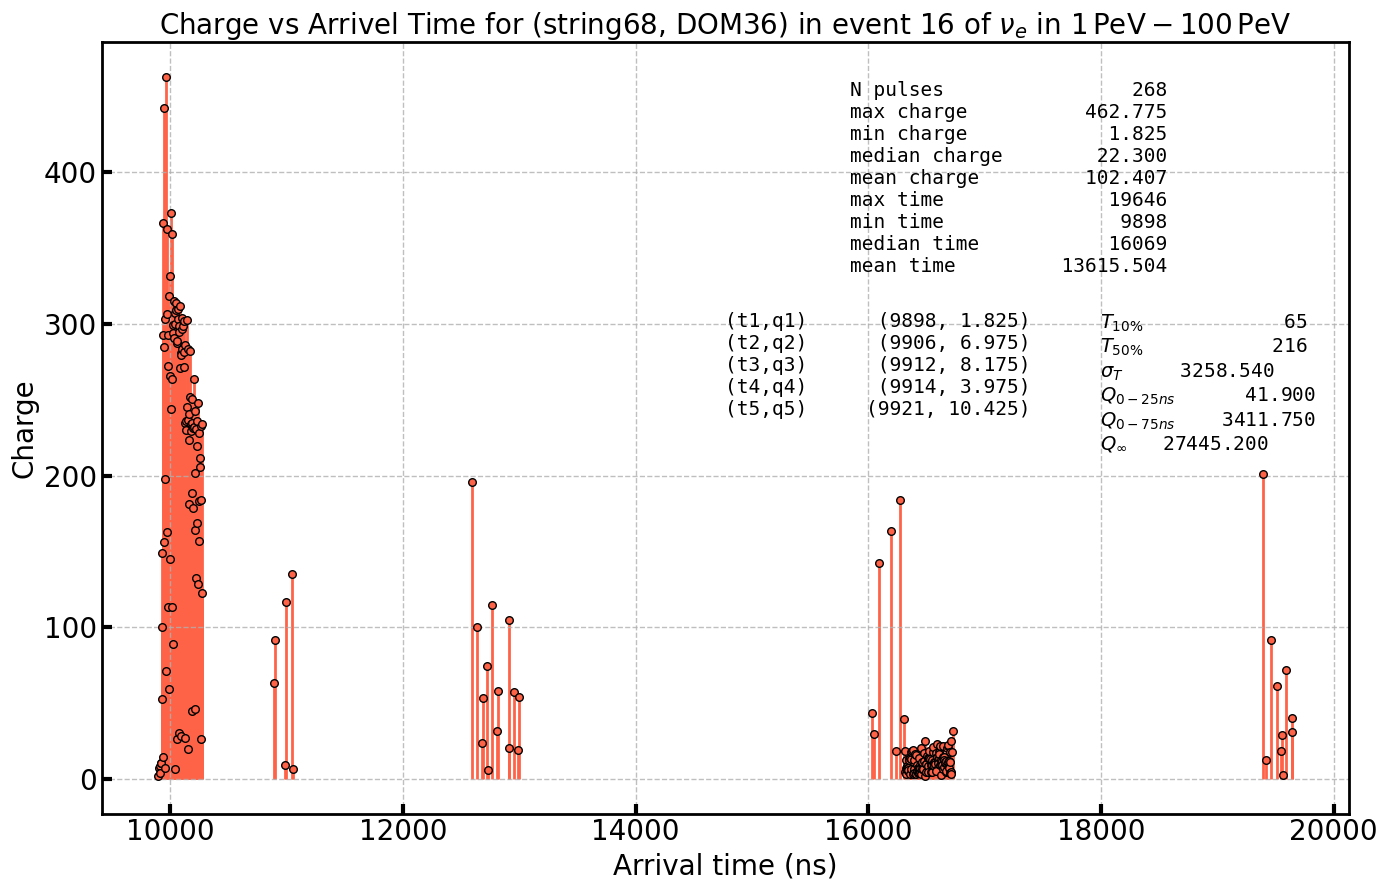

In [40]:
plot_charge_time_single_event_by_DOM(df_e_PeV,
                                  event_index=16,#15, 
                                  flavour=Flavour.E, 
                                  N_pulses_cut=250,
                                  energy_range=EnergyRange.ER_1_PEV_100_PEV)

 1702 active DOMs in event 31


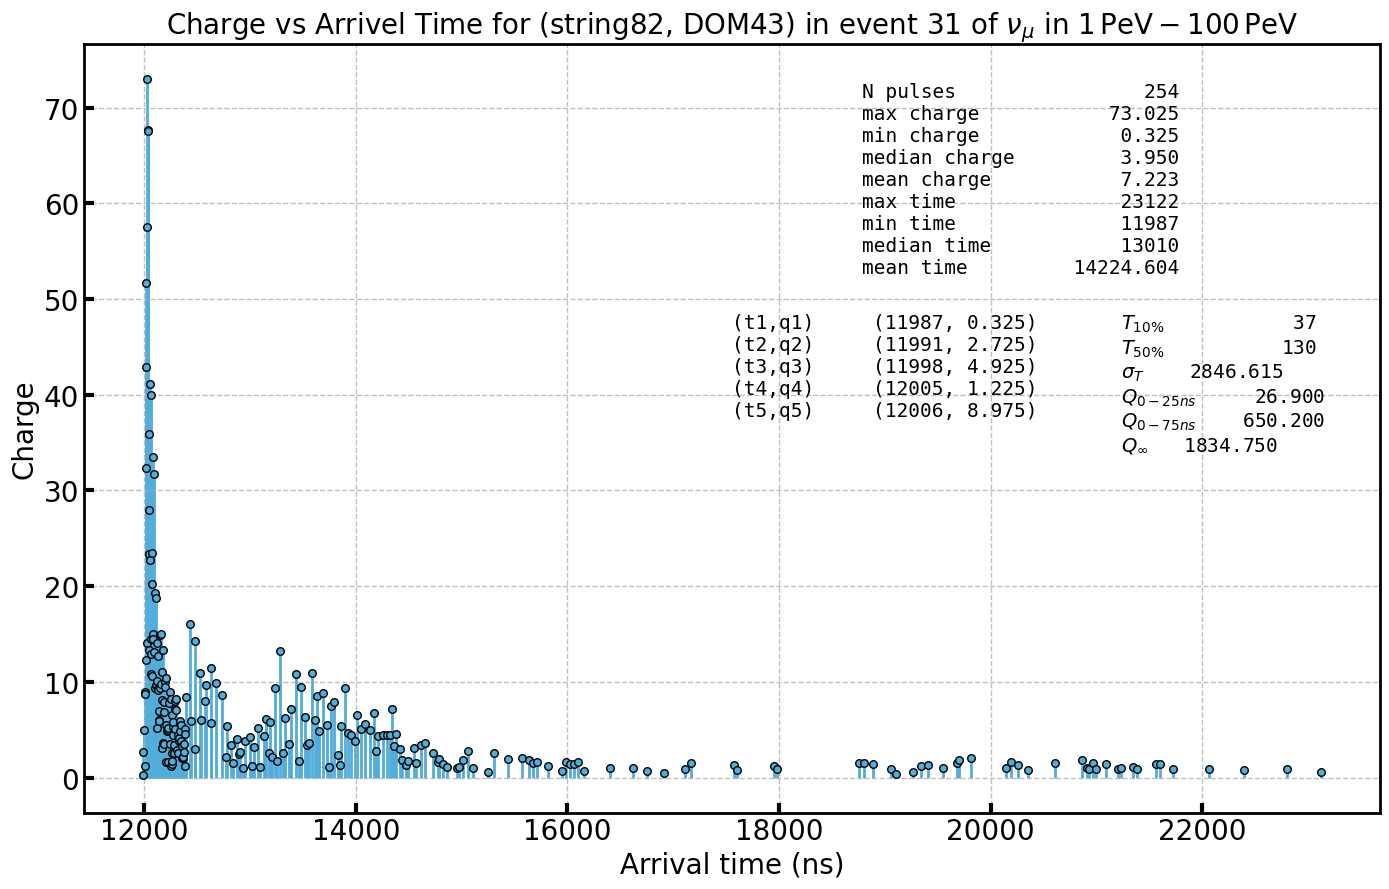

In [41]:
plot_charge_time_single_event_by_DOM(df_mu_PeV,
                                  event_index=31, 
                                  flavour=Flavour.MU, 
                                  N_pulses_cut=250,
                                  energy_range=EnergyRange.ER_1_PEV_100_PEV)

 1176 active DOMs in event 0


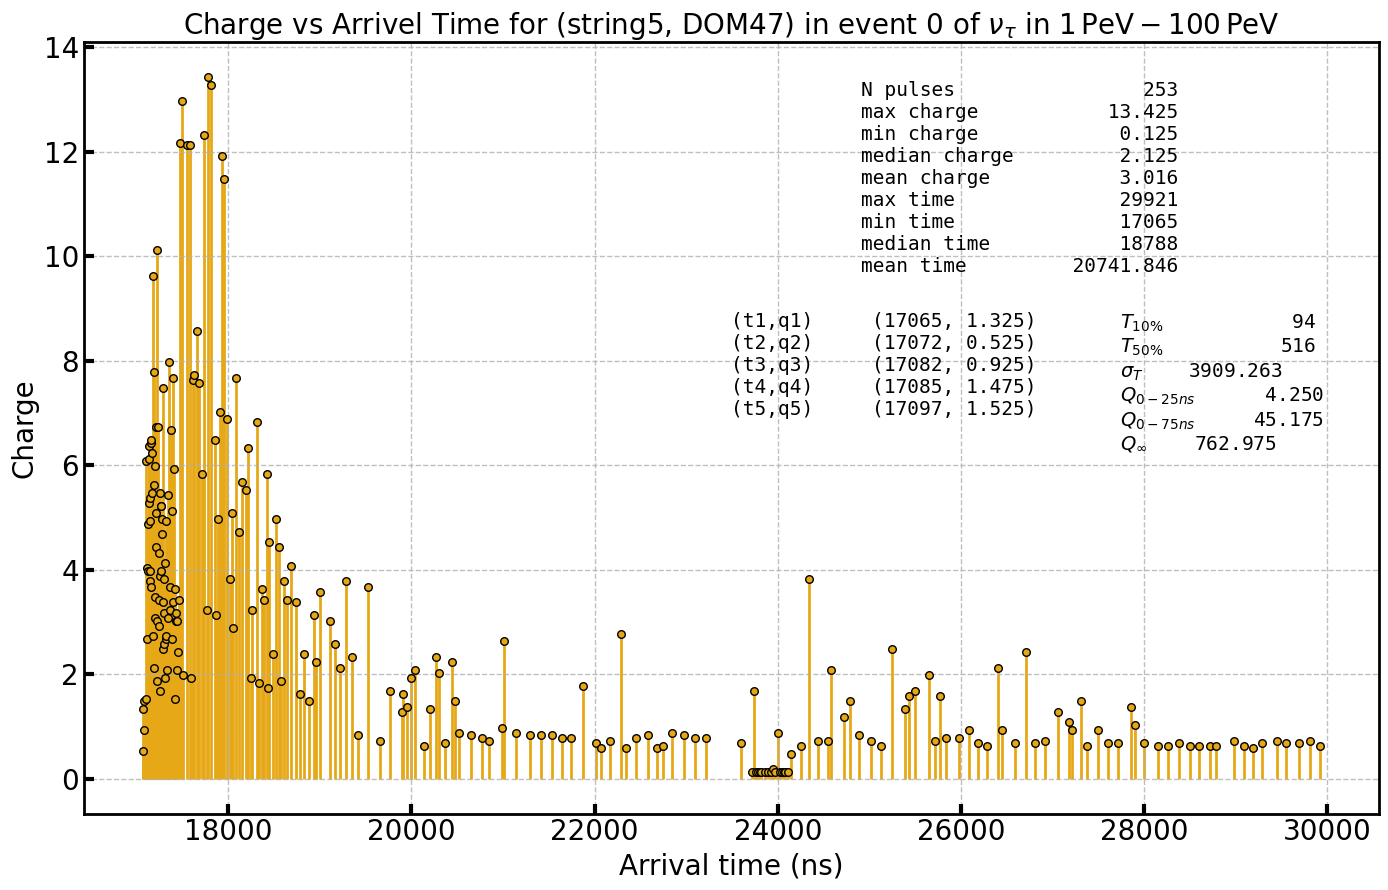

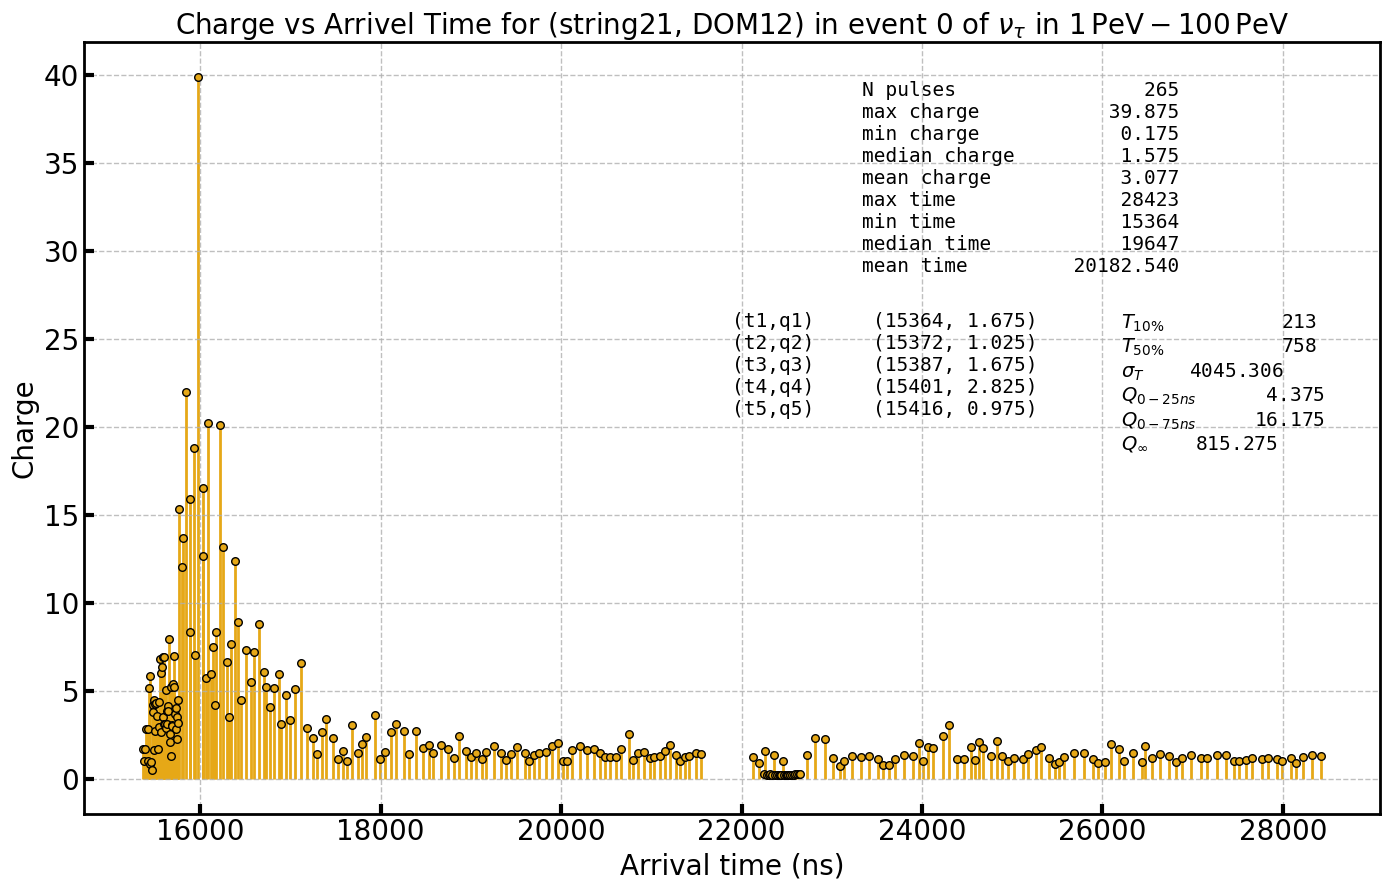

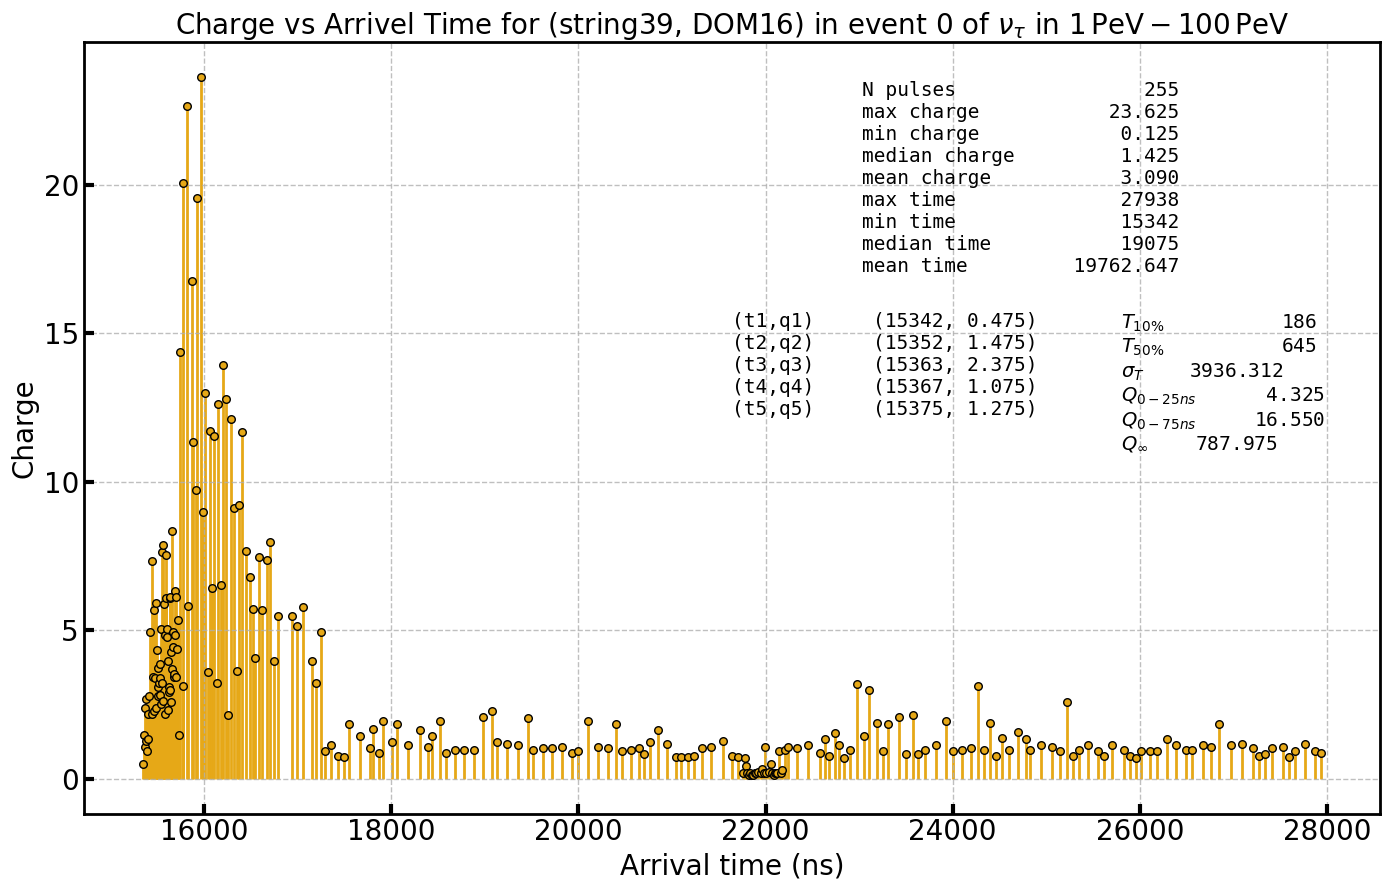

In [42]:
plot_charge_time_single_event_by_DOM(df_tau_PeV,
                                  event_index=0, 
                                  flavour=Flavour.TAU, 
                                  N_pulses_cut=250,
                                  energy_range=EnergyRange.ER_1_PEV_100_PEV)

In [68]:
def investigate_N_pulses_at_each_DOM_in_each_event(df: pd.DataFrame, 
                                                    N_events: int,
                                                    N_pulses_cut: int) -> pd.DataFrame:
    charge_dict = get_feature_by_events(df, 'charge')
    pulse_count = {}
    for i, (event_no, dom_data) in enumerate(charge_dict.items()):
        if i >= N_events:
            break
        for (string, dom), charges in dom_data.items():
            pulse_count.setdefault(event_no, {})[(string, dom)] = len(charges)

    # Flatten nested dict and build DataFrame
    flat_dict = {
        (ev, s, d): n 
        for ev, sub in pulse_count.items() 
        for (s, d), n in sub.items()
    }
    df_pulse_count = pd.DataFrame.from_dict(flat_dict, orient='index')
    df_pulse_count.index = pd.MultiIndex.from_tuples(df_pulse_count.index, names=['event_no', 'string', 'dom_number'])
    df_pulse_count = df_pulse_count.reset_index().rename(columns={0: 'N_pulses'})

    df_select = df_pulse_count[df_pulse_count['N_pulses'] > N_pulses_cut]
    print(f"{df_select['event_no'].value_counts()}")


In [69]:
investigate_N_pulses_at_each_DOM_in_each_event(df_e_TeV, N_events=100, N_pulses_cut=100)

event_no
87    10
29     8
62     8
95     7
67     6
7      5
57     5
10     5
32     5
9      5
58     5
97     4
94     4
63     4
23     3
42     2
49     2
31     2
28     2
22     2
20     2
38     1
26     1
89     1
13     1
98     1
Name: count, dtype: int64


In [70]:
investigate_N_pulses_at_each_DOM_in_each_event(df_mu_TeV, N_events=100, N_pulses_cut=100)

event_no
45    13
27     7
56     7
23     5
67     3
84     2
99     2
71     1
Name: count, dtype: int64


In [71]:
investigate_N_pulses_at_each_DOM_in_each_event(df_tau_TeV, N_events=100, N_pulses_cut=100)

event_no
56    16
17    11
16     5
45     4
53     4
40     3
48     3
78     3
63     1
Name: count, dtype: int64


In [76]:
investigate_N_pulses_at_each_DOM_in_each_event(df_e_PeV, N_events=100, N_pulses_cut=225)

event_no
28    8
54    8
84    7
38    4
55    3
82    3
41    3
89    3
36    3
16    2
57    2
24    2
15    2
34    1
60    1
64    1
69    1
77    1
80    1
21    1
88    1
Name: count, dtype: int64


In [77]:
investigate_N_pulses_at_each_DOM_in_each_event(df_mu_PeV, N_events=100, N_pulses_cut=225)

event_no
26    5
78    4
77    3
31    2
64    2
4     1
10    1
23    1
36    1
41    1
55    1
Name: count, dtype: int64


In [78]:
investigate_N_pulses_at_each_DOM_in_each_event(df_tau_PeV, N_events=100, N_pulses_cut=225)

event_no
0     9
49    3
90    3
37    2
74    2
93    2
3     1
9     1
30    1
42    1
70    1
Name: count, dtype: int64
